<a href="https://colab.research.google.com/github/yinghaow525/MSBA-Projects/blob/main/teamA6_final_deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BA820 Team Project
Team A6: Yihan Jia, Yinghao Wang, Simeng Li, Xiangshan Mu, Kaiyu Wang  
>**Business Problem:**  
Customer Personality Analysis is a detailed analysis to figure out a company’s ideal customers. It helps a business to better understand its current customer composition, find and create loyal customer base, and makes it easier for a company to modify products according to the specific needs, behaviors and concerns of different types of customers.
Understanding customer personality will help the company to group customers with similar purchasing behaviors and preferences together, and thus modify its own product line based on different types of customer segments to satisfy segments’ needs and wants. In this way, the company can achieve an effective marketing strategy for certain customer groups and boost product sales.


## 1. Data Source

### 1.1 Dataset Description

>Customer Personality Analysis.
>- Dataset contains 2240 observations with 30 features.
>>- 10 columns are customer personality features of basic demographic information, important features that will be our basis for clustering include: education, marital status, income, kid home and complaint. 
>>- 1 column of unique customer id, which can be set as the row index but will not be used as a feature for our clustering analysis. 
>>- 1 column of long textual data, which is reviews about products purchased.
>>- Other columns contain information of products, place and promotion which are basic components in the marketing field, these columns can be used as auxiliary features for our analysis.
>- Data Provided by: O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

### 1.2 Overview of Dataset 

Table of columns and corresponding content:

|Variables          |Definitions|
------------------- |------------------
|ID       | Customer's unique identifier|
|Year_Birth       | Customer's birth year |
|Education      |Customer's education level |
|Marital_Status       | Customer's marital status |
|Income      | Customer's yearly household income|
|Kidhome     | Number of children in customer's household|
|Teenhome      |Number of teenagers in customer's household |
|Dt_Customer   | Date of customer's enrollment with the company |
|Recency   |Number of days since customer's last purchase|
|Complain       | 1 if customer complained in the last 2 years, 0 otherwise|
|MntWines     | Amount spent on wine in last 2 years |
|MntFruits       | Amount spent on fruits in last 2 years |
|MntMeatProducts | Amount spent on meat products in last 2 years|
|MntFishProducts| Amount spent on fish in last 2 years|
|MntSweetProducts | Amount spent on sweet products in last 2 years|
|MntGoldProducts| Amount spent on gold in last 2 years|
|NumDealsPurchases     | Number of purchases made with a discount |
|AcceptedCmp1     | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
|AcceptedCmp2    | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
|AcceptedCmp3     | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
|AcceptedCmp4     | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
|AcceptedCmp5     | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
|Response      | 1 if customer accepted the offer in the last campaign, 0 otherwise |
|NumWebPurchases    |  Number of purchases made through the company’s web site |
|NumWebVisitsMonth    | Number of visits to company’s web site in the last month |
|NumStorePurchases| Number of purchases made directly in stores|
|NumWebVisitsMonth| Number of visits to company’s web site in the last month|
|Reviews| Reviews on purchased food products|

## 2. Data Preprocessing

### 2.1 Import Libraries

In [1]:
# supress outputs
%%capture
# installs 
! pip install newspaper3k
! pip install -U spacy
! pip install afinn
! pip install spacytextblob
! pip install pysrt
! pip install textdescriptives
! pip install tokenwiser
! pip install scikit-plot

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler
import scikitplot as skplot
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

# text imports
import spacy
from spacy import cli
from spacytextblob.spacytextblob import SpacyTextBlob
import textdescriptives as td
import tokenwiser

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
import gensim

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neighbors import NearestNeighbors

from afinn import Afinn
from newspaper import Article

import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import word_tokenize, RegexpTokenizer, WordPunctTokenizer, TweetTokenizer
import spacy
from spacy import cli
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy import displacy
cli.download("en_core_web_sm")

# prediction models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

#reset recursionlimit
import sys
sys.setrecursionlimit(10000)

#plt style
plt.style.use("seaborn")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:

! pip install umap-learn
! pip install -U umap

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/umap/*
Proceed (y/n)? y
  Successfully uninstalled umap-0.1.1
     |████████████████████████████████| 86 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 29.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=a24cb4bb69ff5a5cc8e7eb75907c3106aa30a5501a23e2d62b389a10a296169d
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=43cb68019be453d7e72da1ccc81995abe648768dd781b3327fecdfd8e277462e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
  Using cached umap-0.1.1-py3-none-any.whl


In [4]:
from umap.umap_ import UMAP

### 2.2 Import Data

In [5]:
# read csv file
df_c = pd.read_csv('https://raw.githubusercontent.com/yinghaow525/MSBA-Projects/main/BA820/Dataset/dataset.csv?token=AUX5PIPWJETERKBUKU2JSVDBXAWPC')

In [6]:
# our dataset contains 2240 observations and 30 columns
df_c.shape

(2240, 30)

In [7]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 2.3 Data Cleaning & Processing



- Check NAs & Duplicates
- Data Processing
  - Lowercase column names' for convenience
  - Transform dummy variables
  - Cast `Dt_Customer` into date type
  - Set index
- Feature Engineering
  - Rename columns
  - Add necessary features for further analysis
  - Drop redundant columns
- Check Outliers
- Potential Churned Customers
- Long Textual Feature Reviews 

#### 2.3.1 Check NAs & Duplicates

In [8]:
# check NA
display(df_c.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Reviews                 0
dtype: int64

In [9]:
#Small amount of NA only occupies 1% of our orignal dataset, so we will not fillna with mode or median.
df_c = df_c.dropna(subset=['Income'])

In [10]:
# re-check NAs
display(df_c.isnull().sum().sum())

0

In [11]:
# there is no duplicates for our datasets
dupes = df_c.duplicated()
dupes.sum()

0

#### 2.3.2 Data Processing

In [12]:
# lower columns' names for convenience
df_c.columns = df_c.columns.str.lower()

In [13]:
# value counts for education level
df_c.education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: education, dtype: int64

In [14]:
# replace education level into numeric ones
df_c["education"]=df_c["education"].replace(
    {"Basic": 0, "2n Cycle":1, 
     "Graduation": 2, "Master": 3, 
     "PhD": 4})

In [15]:
# value counts for marital status
df_c.marital_status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

In [16]:
# replace marital status into living status: with partner - 1, single - 0 
df_c["living_status"] = df_c["marital_status"].replace(
    {"Married": 1,"Together":1, 
     "Single": 0, "Divorced": 0, 
     "Widow": 0, "Alone": 0, 
     "Absurd": 0, "YOLO": 0})

In [17]:
# cast `dt_customer` into datetime format, so that we can extract different factors
df_c['dt_customer'] = pd.to_datetime(df_c['dt_customer'])


In [18]:
# set unique customer id as index
df_c.set_index('id', inplace=True)

#### 2.3.3 Feature Engineering

In [19]:
# rename columns of product purchasing amount for clarification
df_c=df_c.rename(columns = 
             {"mntwines": "wines","mntfruits":"fruits",
              "mntmeatproducts":"meat","mntfishproducts":"fish",
              "mntsweetproducts":"sweets","mntgoldprods":"gold"})

In [20]:
# add `family_member` that indicates total number of family members (parent(s) + number of children)
df_c["family_member"] = df_c["kidhome"] + df_c["teenhome"] + np.where(df_c.living_status == 1, 2, 1)

In [21]:
# add `is_parent` that indicates whether the customer is a parent or not, 
# 1: is a parent, 0: not a parent
df_c["is_parent"] = np.where(df_c.kidhome + df_c.teenhome > 0, 1, 0)

In [22]:
# add `age` that indicates current age of customer  
df_c["age"] = 2021 - df_c["year_birth"]

In [23]:
# drop meaningless/redundant columns
df_c.drop(columns=['dt_customer', 'z_costcontact', 'z_revenue', 'year_birth', 
                 'marital_status', 'kidhome', 'teenhome',
                 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4',
                 'acceptedcmp5', 'response'], inplace=True) 

#### 2.3.4 Check Outliers

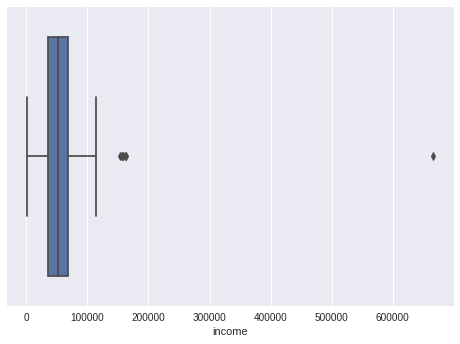

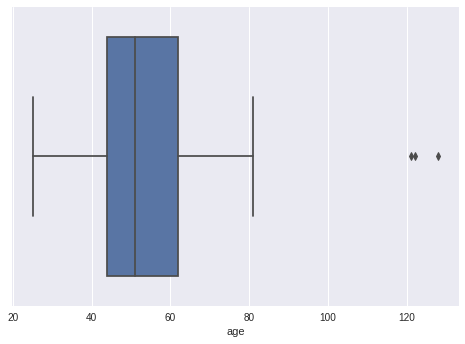

In [24]:
#we can find there are some obvious outliers for `income` and `age`
lst = [df_c.income, df_c.age]
for _ in lst:
  sns.boxplot(x=_)
  plt.show()

In [25]:
# drop rows with income > 600,000
df_c.drop(df_c[df_c.income > 600000].index, inplace=True)
# drop rows with age > 120
df_c.drop(df_c[df_c.age > 120].index, inplace=True)

In [26]:
# check min and max values for total spending of individual customer
min_total_spent = df_c.loc[:, 'wines':'gold'].sum(axis=1).min()
print('The minimum total spent record for individual customer is ${}.'.format(min_total_spent))
max_total_spent = df_c.loc[:, 'wines':'gold'].sum(axis=1).max()
print('The maximum total spent record for individual customer is ${}.'.format(max_total_spent))

The minimum total spent record for individual customer is $5.
The maximum total spent record for individual customer is $2525.


In [27]:
# check most/least recent purchasing records
most_recent = df_c.recency.min()
print('The most recent purchasing records happend {} days ago.'.format(most_recent))
least_recent = df_c.recency.max()
print('The least recent purchasing records happend {} days ago.'.format(least_recent))

The most recent purchasing records happend 0 days ago.
The least recent purchasing records happend 99 days ago.


In [28]:
# then we leave long textual column reviews along
df = df_c.drop(columns='reviews', inplace=False)
len(df) == len(df_c.reviews)

True

#### 2.3.5 Potential Churned Customer


- There are 194 customers who have not purchased for more than 90 days. 
- 3 of them have never visited the company's website. 
  - These 3 customers are middle-aged while have different purchasing habits and different demographical background. 

- Based on purchasing recency, we broken `recency` feature into 4 categories of 1-4 scale: 
  - customers with purchases within the last 30 days --> category 1
  - between 31 and 60 days --> category 2
  - between 61 and 90 days --> category 3
  - longer than 90 days --> category 4

In [29]:
# number of customers have not purchased for more than 90 days:
len(df.loc[(df.recency > 90)])

194

In [30]:
# several customers have not make a purchase in recent 90 days, and never visit the website:
df.loc[(df.recency > 90) & (df.numwebvisitsmonth == 0)]

,education,income,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,living_status,family_member,is_parent,age
id,,,,,,,,,,,,,,,,,,,
8475,4,157243.0,98,20,2,1582,1,2,1,15,0,22,0,0,0,1,3,1,48
11074,2,85072.0,94,494,92,391,194,11,241,1,3,4,10,0,0,0,1,0,44
6237,4,7144.0,92,81,4,33,5,2,291,0,23,1,1,0,0,0,3,1,55


In [31]:
# now all the features are numeric ones
df.describe().T

,count,mean,std,min,25%,50%,75%,max
education,2212.0,2.460669,1.004193,0.0,2.0,2.0,3.00,4.0
income,2212.0,51958.810579,21527.278844,1730.0,35233.5,51371.0,68487.00,162397.0
recency,2212.0,49.019439,28.943121,0.0,24.0,49.0,74.00,99.0
wines,2212.0,305.287523,337.322940,0.0,24.0,175.5,505.00,1493.0
fruits,2212.0,26.329566,39.744052,0.0,2.0,8.0,33.00,199.0
meat,2212.0,167.029837,224.254493,0.0,16.0,68.0,232.25,1725.0
fish,2212.0,37.648734,54.772033,0.0,3.0,12.0,50.00,259.0
sweets,2212.0,27.046564,41.090991,0.0,1.0,8.0,33.00,262.0
gold,2212.0,43.925859,51.706981,0.0,9.0,24.5,56.00,321.0
numdealspurchases,2212.0,2.324593,1.924507,0.0,1.0,2.0,3.00,15.0


In [32]:
# we leave with 2209 records and 19 features for further analysis, plus one long text column
df.shape

(2212, 19)

#### 2.3.6 Long Textual Feature Reviews

In [33]:
# subset id and reviews from org dataset
reviews = df_c.loc[:, ['reviews']]

In [34]:
# split each review into list of tokens 
reviews['tokens'] = reviews.reviews.str.split()

In [35]:
# review token count
reviews['length'] = reviews.tokens.apply(lambda x: len(x))
reviews.drop(columns='tokens', inplace=True)

## 3. Exploratory Data Analysis

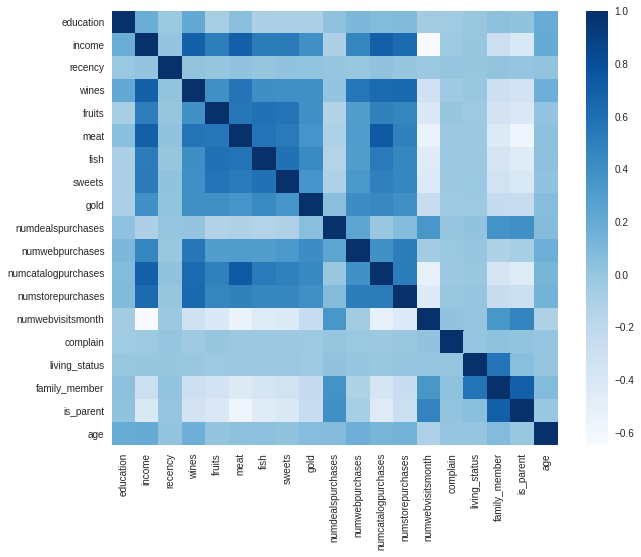

In [36]:
# correlation heatmap
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, cmap="Blues")
plt.show()

### 3.1 Customer Basic Demographic Infos

#### 3.1.1 Distribution of ages
- Customer age ranges from 25~ 81, with an average of 52 ;

- Customers are concentrated in middle-aged groups of 40 ~ 55 years old;

- The youngest age group (20,30] occupies the least share, account for only 1.94% of total.


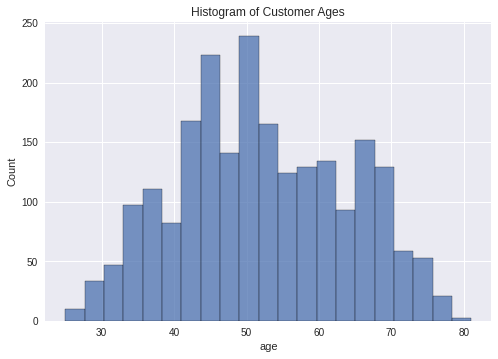

In [37]:
sns.histplot(x=df.age)
plt.title('Histogram of Customer Ages')
plt.show()

#### 3.1.2 Distribution of family members of customers
- Most customers are parent with at least one child.

- Nearly half of customers have a family of 3 members, with a combination of: 
2 parents/partners + 1 kid

- Number of customers of 2 parents/partners without kids is similar to that of 1 parent +1 kid.


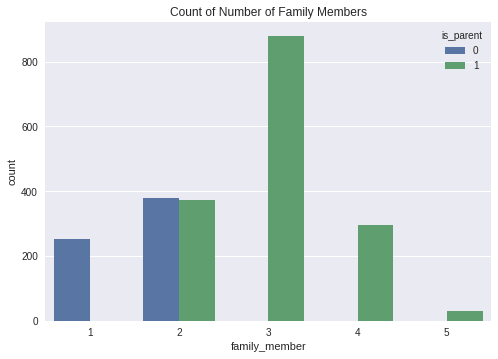

In [38]:
sns.countplot(x=df.family_member, hue = df.is_parent)
plt.title('Count of Number of Family Members')
plt.show()

#### 3.1.3 Distribution of Income Level

- Previously excluding one extreme outlier of $600,000;

- Income distribution is relatively normal within $0 ~ 100,000 range;

- Average income is $51,958;

- Most customers are concentrated within $30,000 ~ 70,000 range.



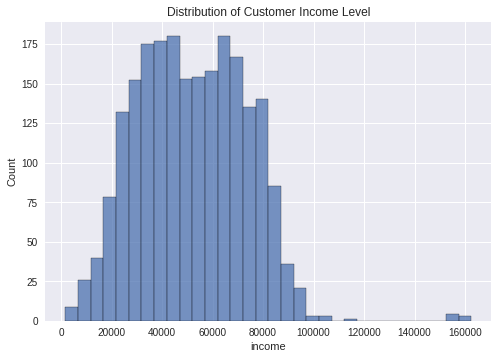

In [39]:
sns.histplot(x=df.income)
plt.title('Distribution of Customer Income Level')
plt.show()

#### 3.1.4 Proportion of Education Level
- Nearly half of the customers are Master degree level;

- Graduation-degree education level customers are the minimum share, only account for 2.44% of the total, followed by PhDs.



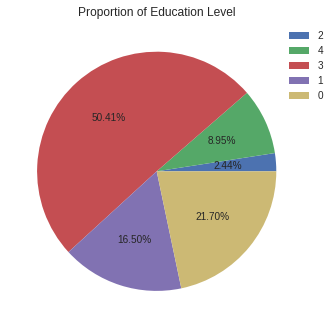

In [40]:
plt.pie(x=df.value_counts('education').sort_index(), autopct = '%1.2f%%')
plt.legend(df.value_counts('education').index, loc='upper center', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True)
plt.title('Proportion of Education Level')
plt.show()

### 3.2 Customer Purchasing Habits

#### 3.2.1 Shopping locations
- Most customers prefer to make purchases in store, followed by web (online) purchasing.

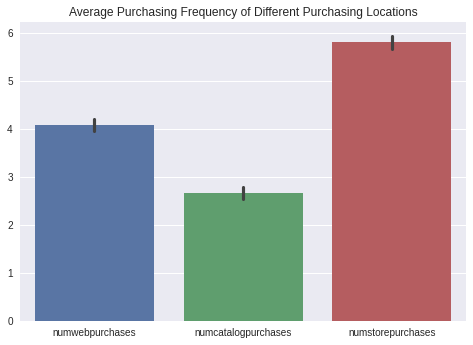

In [41]:
sns.barplot(data=df.loc[:, 'numwebpurchases':'numstorepurchases'])
plt.title('Average Purchasing Frequency of Different Purchasing Locations')
plt.show()

#### 3.2.2 Purchases with Discounts
- Most customers made at least 1 purchase with discounts;
- Total spending with 2 deal purchases is the minumum among all, this group of customers could be more price sensitive compared with others.

In [42]:
deal = df.groupby('numdealspurchases').agg({'meat': 'mean', 'fruits': 'mean', 
                                            'fish': 'mean', 'sweets': 'mean', 
                                            'wines': 'mean','gold': 'mean',
                                            'numdealspurchases':'count'})

deal['total spending'] = deal.loc[:,'meat':'gold'].sum(axis = 1)
deal

,meat,fruits,fish,sweets,wines,gold,numdealspurchases,total spending
numdealspurchases,,,,,,,,
0,421.227273,56.840909,71.068182,68.977273,548.886364,71.250000,44,1238.250000
1,233.344828,33.895507,49.496343,34.421108,328.131661,43.353187,957,722.642633
2,91.081136,19.393509,28.606491,19.332657,234.172414,39.363083,493,431.949290
3,103.225256,17.883959,26.648464,19.255973,271.372014,38.744027,293,477.129693
4,101.684492,19.385027,24.251337,19.893048,296.026738,41.748663,187,502.989305
5,116.340426,21.478723,21.627660,19.946809,350.638298,51.808511,94,581.840426
6,109.100000,21.266667,32.166667,22.600000,336.633333,63.216667,60,584.983333
7,126.769231,22.461538,28.717949,12.025641,377.307692,68.897436,39,636.179487
8,126.857143,20.214286,28.357143,26.571429,426.785714,69.285714,14,698.071429


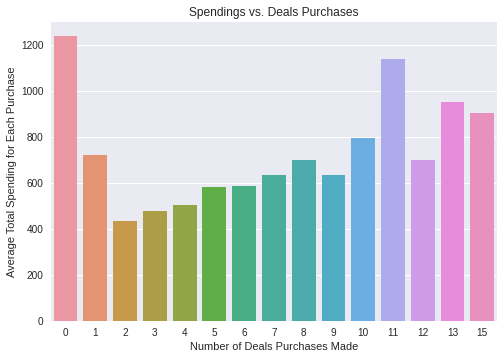

In [43]:
# avg spending by number of deals
sns.barplot(x=deal.index, y=deal['total spending'])
plt.title('Spendings vs. Deals Purchases')
plt.xlabel('Number of Deals Purchases Made')
plt.ylabel('Average Total Spending for Each Purchase')
plt.show()

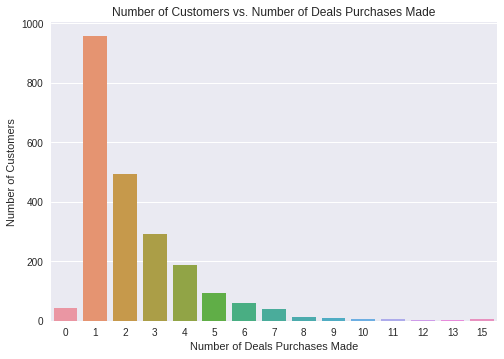

In [44]:
# counts of customers by number of deals
sns.barplot(x=deal.index, 
            y=deal.numdealspurchases)
plt.xlabel('Number of Deals Purchases Made')
plt.ylabel('Number of Customers')
plt.title('Number of Customers vs. Number of Deals Purchases Made')
plt.show()

#### 3.2.3 Spending on different categories of products


In [45]:
products = df.loc[:,'wines':'gold'].sum(axis=0)
products

wines     675296
fruits     58241
meat      369470
fish       83279
sweets     59827
gold       97164
dtype: int64

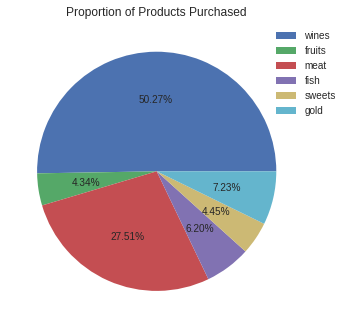

In [46]:
plt.pie(x=products, autopct = '%1.2f%%')
plt.legend(products.index, loc='upper center', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True)
plt.title('Proportion of Products Purchased')
plt.show()

#### 3.2.4 Distribution of recency

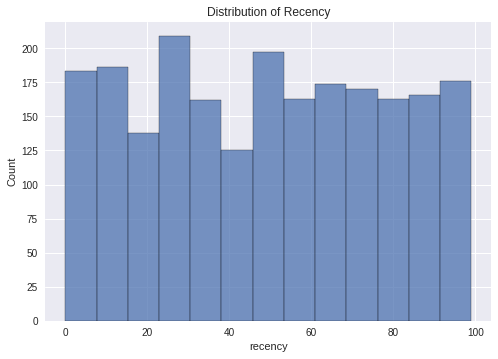

In [47]:
sns.histplot(df.recency)
plt.title('Distribution of Recency')
plt.show()

#### 3.2.5 Profiling by Education

In [48]:
# group by education
groupby_edu = df.groupby('education').agg({'age': 'mean', 'income':'mean', 'living_status': 'mean', 'family_member' : 'mean',
                                   'recency':'mean', 
                                   'meat': 'mean', 'fruits': 'mean', 'fish': 'mean', 'sweets': 'mean', 'wines': 'mean',
                                   'gold': 'mean',
                                   'numdealspurchases' : 'mean', 'numwebpurchases' : 'mean',
                                   'numcatalogpurchases' : 'mean', 'numstorepurchases' : 'mean', 
                                   'complain' : 'mean'})
groupby_edu.reset_index(inplace=True)
groupby_edu['avg_total_spend'] = groupby_edu.loc[:, 'meat': 'gold'].sum(axis = 1)
groupby_edu['meat_perc'] = groupby_edu.meat/groupby_edu.avg_total_spend
groupby_edu['fruits_perc'] = groupby_edu.fruits/groupby_edu.avg_total_spend
groupby_edu['fish_perc'] = groupby_edu.fish/groupby_edu.avg_total_spend
groupby_edu['sweets_perc'] = groupby_edu.sweets/groupby_edu.avg_total_spend
groupby_edu['wines_perc'] = groupby_edu.wines/groupby_edu.avg_total_spend
groupby_edu['gold_perc'] = groupby_edu.gold/groupby_edu.avg_total_spend
groupby_edu

,education,age,income,living_status,family_member,recency,meat,fruits,fish,sweets,wines,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,avg_total_spend,meat_perc,fruits_perc,fish_perc,sweets_perc,wines_perc,gold_perc
0,0,43.537037,20306.259259,0.629630,2.351852,48.444444,11.444444,11.111111,17.055556,12.111111,7.240741,22.833333,1.796296,1.888889,0.481481,2.851852,0.000000,81.796296,0.139914,0.135839,0.208513,0.148064,0.088522,0.279149
1,1,48.207071,47625.333333,0.686869,2.570707,48.383838,136.378788,29.626263,48.454545,35.055556,202.757576,47.217172,2.272727,3.787879,2.373737,5.595960,0.015152,499.489899,0.273036,0.059313,0.097008,0.070183,0.405929,0.094531
2,2,51.370404,52169.749776,0.639462,2.572197,49.904036,180.539013,30.876233,43.448430,31.313004,285.293274,50.718386,2.310314,4.116592,2.739910,5.843946,0.012556,622.188341,0.290168,0.049625,0.069832,0.050327,0.458532,0.081516
3,3,54.052055,52917.534247,0.657534,2.649315,47.317808,162.920548,21.375342,31.493151,20.808219,332.980822,40.189041,2.424658,4.035616,2.545205,5.887671,0.005479,609.767123,0.267185,0.035055,0.051648,0.034125,0.546079,0.065909
4,4,54.816667,56088.258333,0.635417,2.635417,48.585417,168.920833,19.887500,26.716667,20.256250,406.497917,32.004167,2.362500,4.433333,2.981250,6.077083,0.002083,674.283333,0.250519,0.029494,0.039622,0.030041,0.602859,0.047464


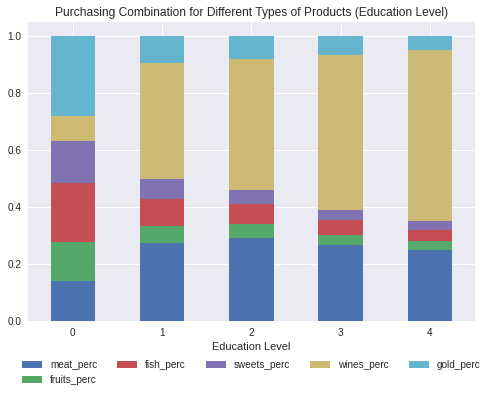

In [49]:
# different types of product purchasing percentage of total spendings, group by different edu level
groupby_edu.plot(x="education", y=["meat_perc", "fruits_perc", "fish_perc", "sweets_perc","wines_perc", "gold_perc"], kind="bar", stacked=True)
plt.title('Purchasing Combination for Different Types of Products (Education Level)')
plt.xlabel('Education Level')
plt.xticks(rotation = 360)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

#### 3.2.6 Profiling by Age Groups

In [50]:
df_age = df['age']
print(df_age.min(),df_age.max())

ages = list(df_age)
bins = [20, 30, 40, 50, 60, 70, 82]
cats = pd.cut(ages, bins, right=True)
age_pro = cats.value_counts()
# type(age_pro)

25 81


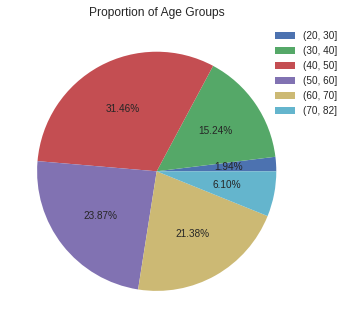

In [51]:
plt.style.use('seaborn')
plt.pie(x=age_pro.values.tolist(), autopct = '%1.2f%%')
plt.legend(age_pro.index, loc='upper center', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True)
plt.title('Proportion of Age Groups')
plt.show()

In [52]:
df_ = df
df_['age_cats'] = cats
groupby_age = df_.groupby('age_cats').agg({'age': 'mean', 'income':'mean', 'living_status': 'mean', 'family_member' : 'mean',
                                   'recency':'mean', 
                                   'meat': 'mean', 'fruits': 'mean', 'fish': 'mean', 'sweets': 'mean', 'wines': 'mean',
                                   'gold': 'mean',
                                   'numdealspurchases' : 'mean', 'numwebpurchases' : 'mean',
                                   'numcatalogpurchases' : 'mean', 'numstorepurchases' : 'mean', 
                                   'complain' : 'mean'})
groupby_age.reset_index(inplace=True)
groupby_age['avg_total_spend'] = groupby_age.loc[:, 'meat': 'gold'].sum(axis = 1)
groupby_age['meat_perc'] = groupby_age['meat']/groupby_age['avg_total_spend']
groupby_age['fruits_perc'] = groupby_age['fruits']/groupby_age['avg_total_spend']
groupby_age['fish_perc'] = groupby_age['fish']/groupby_age['avg_total_spend']
groupby_age['sweets_perc'] = groupby_age['sweets']/groupby_age['avg_total_spend']
groupby_age['wines_perc'] = groupby_age['wines']/groupby_age['avg_total_spend']
groupby_age['gold_perc'] = groupby_age['gold']/groupby_age['avg_total_spend']
groupby_age

,age_cats,age,income,living_status,family_member,recency,meat,fruits,fish,sweets,wines,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,avg_total_spend,meat_perc,fruits_perc,fish_perc,sweets_perc,wines_perc,gold_perc
0,"(20, 30]",28.558140,57882.558140,0.395349,1.511628,46.837209,323.534884,39.837209,62.674419,41.674419,392.651163,66.813953,1.534884,3.651163,4.279070,6.209302,0.023256,927.186047,0.348943,0.042966,0.067596,0.044947,0.423487,0.072061
1,"(30, 40]",36.047478,45117.655786,0.655786,2.284866,48.249258,168.462908,27.175074,37.599407,26.293769,236.474777,39.415430,1.789318,3.356083,2.192878,5.175074,0.011869,535.421365,0.314636,0.050755,0.070224,0.049109,0.441661,0.073616
2,"(40, 50]",45.949713,48803.225575,0.679598,2.747126,48.741379,139.844828,22.632184,32.114943,24.857759,246.535920,38.168103,2.488506,3.824713,2.241379,5.376437,0.007184,504.153736,0.277385,0.044891,0.063701,0.049306,0.489009,0.075707
3,"(50, 60]",54.967803,53359.795455,0.607955,2.702652,49.441288,161.630682,27.352273,36.107955,25.895833,337.971591,46.875000,2.501894,4.401515,2.678030,6.005682,0.001894,635.833333,0.254203,0.043018,0.056788,0.040727,0.531541,0.073722
4,"(60, 70]",65.376321,56777.646934,0.649049,2.636364,50.720930,182.498943,27.522199,42.479915,29.156448,356.991543,50.598309,2.454545,4.460888,3.209302,6.365751,0.014799,689.247357,0.264780,0.039931,0.061632,0.042302,0.517944,0.073411
5,"(70, 82]",73.422222,61055.148148,0.659259,2.333333,45.459259,220.674074,30.800000,47.429630,32.659259,443.148148,42.666667,1.918519,4.881481,3.674074,6.733333,0.014815,817.377778,0.269978,0.037681,0.058027,0.039956,0.542158,0.052199


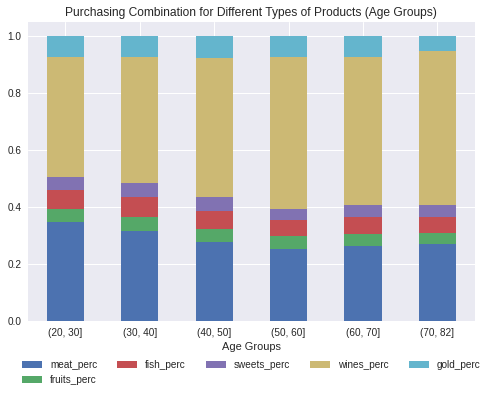

In [53]:
# different types of product purchasing percentage of total spendings, group by different edu level
groupby_age.plot(x="age_cats", y=["meat_perc", "fruits_perc", "fish_perc", "sweets_perc","wines_perc", "gold_perc"], kind="bar", stacked=True)
plt.title('Purchasing Combination for Different Types of Products (Age Groups)')
plt.xlabel('Age Groups')
plt.xticks(rotation = 360)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

### 3.3 Customer Stratification Study



By calculating the total money spent on the products and number of days since customer's last purchase we can classify the customer manully. Customer Stratification includs churn customers, stable customers, high-spending customers. 
Stratification criteria：
- churn customers
  - `Recency` more than 90 days (the customer didnot buy anything within 3 months)
- stable customers
  - `Recency` within 90 (have spending records within the last three months)
  - `total_spent` less than 1000
- high-spending customers
  - `Recency` within 90 (have spending records within the last three months)
  - `total_spent` more than 1000


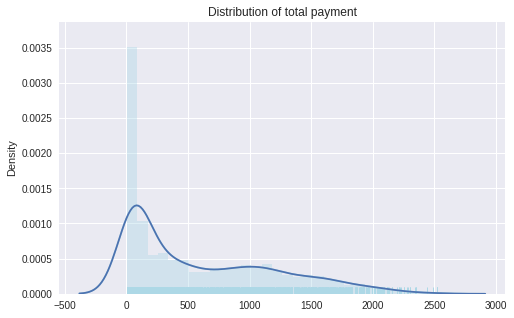

In [54]:
# check the distribution of total money pay for the product 
# Most consumers have accumulated spending between 0 and 150
total_spent = df.loc[:, 'wines':'gold'].sum(axis=1)
plt.figure(figsize=(8,5))
sns.distplot(total_spent, color='lightblue', bins=30, rug=True)
sns.distplot(total_spent, hist=False)
plt.title("Distribution of total payment")
plt.show()

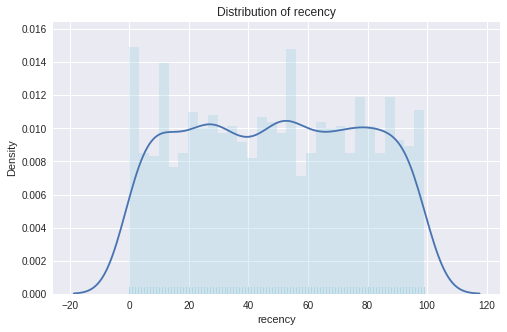

In [55]:
# check the value counts of last purchase time for the product 

plt.figure(figsize=(8,5))
sns.distplot(df.recency, color='lightblue', bins=30, rug=True)
sns.distplot(df.recency, hist=False)
plt.title("Distribution of recency")
plt.show()

In [56]:
# Churn Customers 
# there is 194 Churn Customers which is 8.67% of whole observations
churn = df.loc[df["recency"] > 90]
churn.shape

(194, 20)

In [57]:
# Stable Customers 
# there is 1802 Stable Customers which is 79.78% of whole observations
stable = df.loc[(df["recency"] <= 90) & (df.loc[:, 'wines':'gold'].sum(axis=1)< 1500)]
stable.shape

(1802, 20)

In [58]:
# High-spending Customers 
# there is 216 high-spending Customers which is 9.42% of whole observations
high_spending = df.loc[(df["recency"] <= 90) & (df.loc[:, 'wines':'gold'].sum(axis=1)> 1500)]
high_spending.shape

(216, 20)

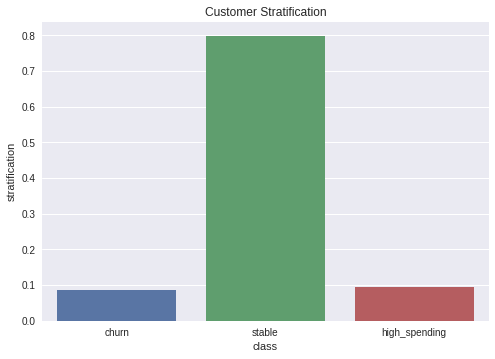

In [59]:
data = {"churn":0.0867, "stable":0.7978, "high_spending":0.0942}
data_ = ["churn", "stable", "high_spending"]
stratification = pd.DataFrame(data, index = ['stratification']).T
stratification['class'] = data_

sns.barplot(x = stratification['class'], y =stratification['stratification'], data = stratification)
plt.title("Customer Stratification")
plt.show()

### 3.4 Word Counts for Reviews

In [60]:
# maximum review length --> 1314
reviews.length.max()

1314

In [61]:
# extreme long reviews
reviews.loc[reviews.length > 1000]

,reviews,length
id,,
2004,I love this organic tart Cherry Butter by Eden...,1314
4501,When I found myself the owner of a dog so smar...,1234
4988,YAY!! A 5 lb Havahart Critter Ridder is not av...,1060


In [62]:
# minimum review length --> 6
reviews.length.min()

6

In [63]:
# minimum length review is meaningless, will be exclude during doc token process
reviews.loc[reviews.length == 6]

,reviews,length
id,,
2781,"span class=""tiny""> Length:: 4:34 Mins /...",6


In [64]:
# avg review word length
reviews.length.mean()

79.499095840868

In [65]:
reviews.length.count()

2212

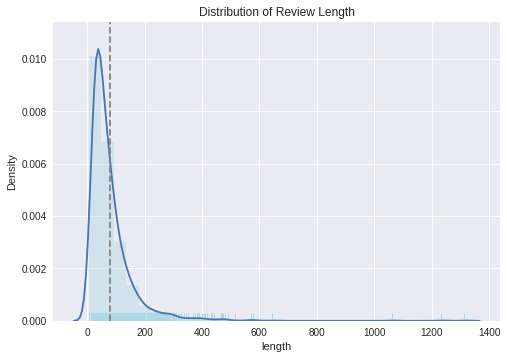

In [66]:
# histogram for tokens length
sns.distplot(reviews.length, bins=30,color='lightblue', rug=True)
sns.distplot(reviews.length, hist=False)
plt.axvline(x = reviews.length.mean(), c = 'gray', linestyle='--')
plt.title('Distribution of Review Length')
plt.show()

## 4. NLP Analysis

### 4.1 Sentiment Analysis

- We have 188 reviews that have a negative Afinn score.
- We would like to find ways to improve overall customer experience, so we substract those reviews with negative score, and perform further analysis on them.

In [67]:
# initializing nlp model
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [68]:
# reviews into list
reviews_text = reviews.reviews.tolist()

In [69]:
# score the sentiment use Afinn
afinn = Afinn('en')
sents = [afinn.score(doc) for doc in reviews_text]

In [70]:
# hypothesis : can we use sentiment analysis to proxy for the arc of a story
sent = pd.DataFrame({'review': reviews_text, 'sent': sents})

In [71]:
# count of reviews with negative Afinn score
len(sent.loc[sent.sent < 0])

185

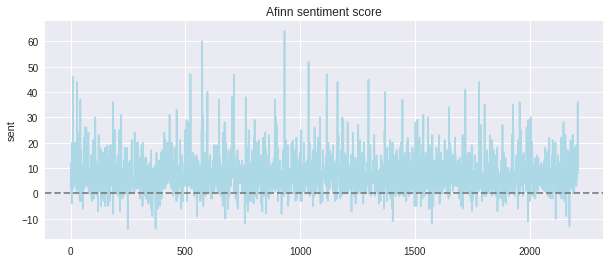

In [72]:
# plot - score is jaggling
plt.figure(figsize=(10,4))
sns.lineplot(x=sent.index, y='sent', data = sent, c='lightblue')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Afinn sentiment score')
plt.show()

In [73]:
# observations for negatively scored reviews
pd.set_option('display.max_colwidth', 1000)
sent.loc[sent.sent < 0].sample(3)

,review,sent
1876,"I've tried on 3 separate occasions to down this stuff and literally vomitted this and everything else I'd had all day up within minutes of drinking this. I can't believe ANYONE can find this even doable--It tastes like dirt and burns going down-never experienced anything this revolting in my life and I had such high hopes for this product. On another note, I tried the chocolate and orange creamsicle of Amazing Grass Superfood and I gotta say-night and day difference, no problems drinking either one of those. I hate that I bought the bigger can of this wheatgrass powder and now I can't even return it.",-2.0
772,"I was surprised to see that this product actually works, but they don't warn you about the god-awful smell. It's horrid, truly.",-7.0
1574,"I purchased these nuts based on prior reviews and because they seemed like a good value for my money. Boy, was I wrong!! The nuts were very small with black areas, not all like the picture. They were also tasteless. I would be ashamed to put these nuts into a salad or other dish where they can be seen. And I am sure they would ruin the taste of pesto. The old saying true: you get what you pay for. These nuts are cheap and lousy.",-12.0


In [74]:
# for positively scored reviews
pd.set_option('display.max_colwidth', 1000)
sent.loc[sent.sent > 0].sample(3)

,review,sent
576,"When I found myself the owner of a dog so smart that I could tell her to unlock the car door and she could do it ( I kid you not, Biscit has the ain of a human 4 year old...) I began to look at animals differently...she truly became even more my my ""baby"" each day. Now let me backtrack into the day I decided to begin researching dog food with this baby in my life... I was a physician recruiter and had to visit a hospital in a town in Texas where they have more cows per capital than anywhere else in the U.S. in order to utilize them for human consumption. I had several tours of this town and found out by the owners of several companies that it was no accident one of the largest dog food manufacturers is also here. (It is not Newmans own...bear with me) At first that sounds good to you, doesnt' it? That they must be using, for this other company, food grade meat in their dog food? Well, I personally, first hand, watched bull dozers pick up dying and dead cattle. I wa...",31.0
1726,"Sardines, Tabasco, onions on a Swedish Rye ead is an acquired, but delicious. Of course, you get to drink a beer with that.",3.0
1638,"Diamond Foods is the company that for nearly 90 years has been ubiquitously marketing its quality packaged nuts throughout the world. The Emerald product line was started by the company in 2003 to market their products to a more upscale consumer segment, where Emerald trades on the particular hipster, dinner-party image that their products sometime ing to mind. Emerald roasted almonds come packaged in durable 11-ounce canisters with screw-on tops to help keep the product fresh (and, it should be noted, indented sides so that one's hands can easily grasp the container even if one has previously imbibed a few cocktails). Sampling the contents, I was not disappointed; I found the almonds to be as flavorful and addictive as they can be. Interestingly, Emerald also chose to provide a variety of flavoring options such as dark chocolate to help keep things interesting for us. avo! The bottom line is that if you like almonds, buying the Emerald product should be an easy decisio...",14.0


In [75]:
# highest and lowest scores
print('The highest sentiment score is {}'.format(sent.sent.max()))
print('The lowest sentiment score is {}'.format(sent.sent.min()))
print('The avg sentiment score is {}'.format(sent.sent.mean()))

The highest sentiment score is 64.0
The lowest sentiment score is -14.0
The avg sentiment score is 7.680831826401446


### 4.2 Text Cleaning


- Lemmatization to convert words into base form
- Remove white spaces, punctuations, and special characters
- Remove non-alphabetic words
- Remove stopwords

In [76]:
# generating negative score reviews 
neg_sent = ' '.join(sent.loc[sent.sent < 0].review.tolist())

#create a Doc object
doc = nlp(neg_sent)

#generate list of lemmas
lemmas = [token.lemma_ for token in doc]

# initialize stopwords
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# remove stop-words and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma.lower() not in stopwords]

# processed tokens into a list
corpus = ' '.join(a_lemmas)

In [77]:
# generating samples of positive scored reviews
pos_sent = ' '.join(sent.loc[sent.sent > 0].review.tolist())

#create a different Doc object
doc_p = nlp(pos_sent)

#generate list of lemmas
lemmas_p = [token.lemma_ for token in doc_p]

# remove stop-words and non-alphabetic tokens
a_lemmas_p = [lemma for lemma in lemmas_p if lemma.isalpha() and lemma.lower() not in stopwords]

# processed tokens into a list
corpus_p = ' '.join(a_lemmas_p)

### 4.3 Keyword Analysis for Positive Afinn Score Reviews

- Top 10 words for positive Afinn score reviews are: like, good, taste, flavor, use, love, product, great, coffee and try.

In [78]:
# initialize wordcloud object
wc_p = WordCloud(background_color="white", )
wordcloud_p = wc_p.generate(corpus_p)

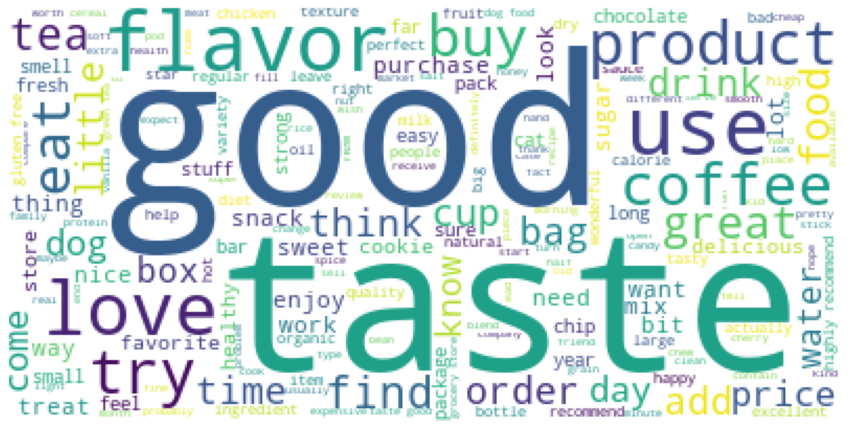

In [79]:
# Display the plot:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_p)
plt.axis("off")
plt.show()

In [80]:
from collections import Counter
words_p = corpus_p.split(" ")
Counter(words_p).most_common(10)

[('like', 1050),
 ('good', 1031),
 ('taste', 842),
 ('flavor', 752),
 ('use', 670),
 ('love', 669),
 ('product', 628),
 ('great', 582),
 ('coffee', 582),
 ('try', 580)]

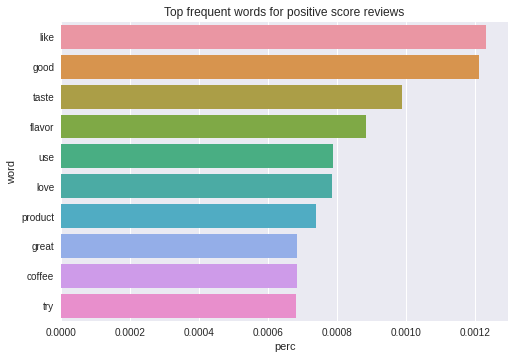

In [81]:
freq_p = pd.DataFrame({'word':['like','good','taste','flavor','use','love','product','great','coffee','try'],
                       'freq':[1050,1031,842,752,670,669,628,582,582,580],
})
freq_p['perc'] = freq_p['freq']/len(pos_sent)
# plot
sns.barplot(data=freq_p, x='perc', y='word', orient = 'h')
plt.title("Top frequent words for positive score reviews")
plt.show()

### 4.4 Keyword Analysis for Negative Afinn Score Reviews

- Top 10 words for negative Afinn score reviews are: product, use, taste, like, dog, buy, try, coffee, bad, and flavor.

In [82]:
# initialize wordcloud object
wc = WordCloud(background_color="white")
wordcloud = wc.generate(corpus)

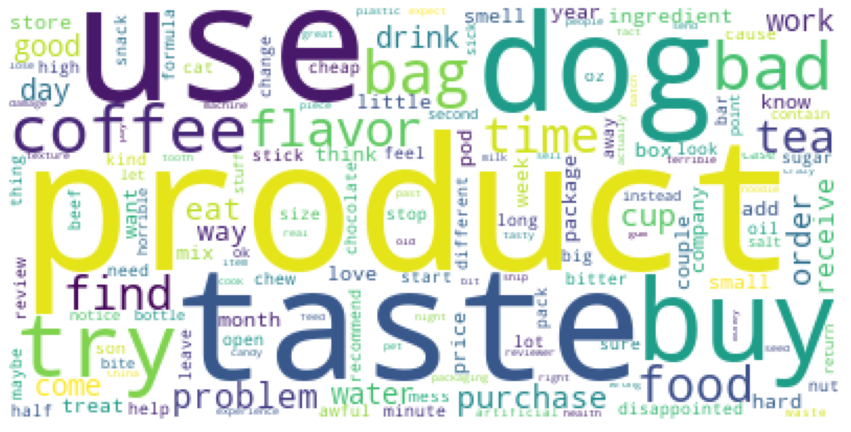

In [83]:
# Display the plot:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [84]:
words = corpus.split(" ")
Counter(words).most_common(10)

[('product', 76),
 ('use', 59),
 ('taste', 58),
 ('like', 51),
 ('dog', 50),
 ('buy', 47),
 ('try', 46),
 ('bad', 46),
 ('coffee', 45),
 ('flavor', 37)]

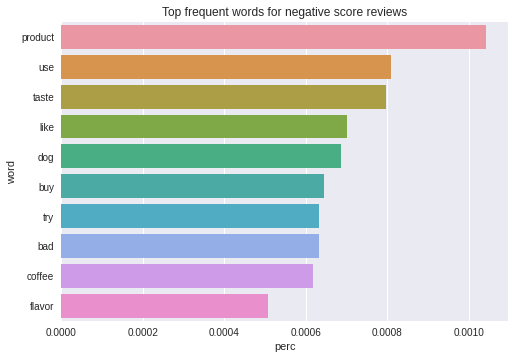

In [85]:
freq_n = pd.DataFrame({'word':['product','use','taste','like','dog','buy','try','bad','coffee','flavor'],
                       'freq':[76, 59, 58, 51, 50, 47, 46, 46, 45, 37]})
freq_n['perc'] = freq_n['freq']/len(neg_sent)
# plot
sns.barplot(data=freq_n, x='perc', y='word', orient = 'h')
plt.title("Top frequent words for negative score reviews")
plt.show()

### 4.5 Predict Potentially Churned Customers

In [86]:
# set x(features) and y(intent variable)
temp = df_c
temp['potential_churn'] = np.where(temp.recency > 90, 1, 0)

y = temp.potential_churn
X = temp.reviews
X = X.str.replace('br','')

In [87]:
# 194 potentially churned customers
len(temp.loc[temp['potential_churn'] == 1])

194

In [88]:
# proportion of potentially churned customers (y==1)
len(temp.loc[temp['potential_churn'] == 1])/len(temp)

0.08770343580470162

In [89]:
# split into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [90]:
X_train.shape

(1548,)

In [91]:
X_test.shape

(664,)

In [92]:
# transform features
vectorizer = CountVectorizer(stop_words="english")
training_features = vectorizer.fit_transform(X_train)
testing_features = vectorizer.transform(X_test)

In [93]:
# initializing and fit model
model = LinearSVC()
model.fit(training_features, y_train)
# prediction
pred = model.predict(testing_features)

In [94]:
#confusion matrix for calculating sensivity and specificity
#extract true negatives, false positives, false negatives and true positives
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
tn, fp, fn, tp

(570, 37, 51, 6)

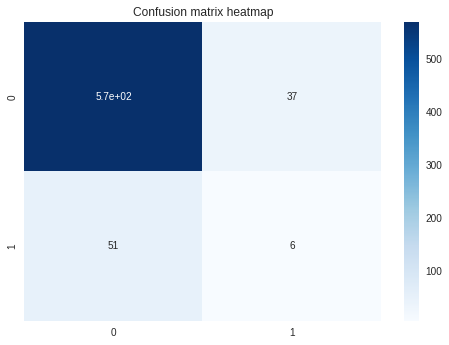

In [95]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, pred), cmap='Blues', annot = True)
plt.title('Confusion matrix heatmap')
plt.show()

In [96]:
# accuracy score
accuracy_score(y_test, pred)

0.8674698795180723

### 4.6 Topic Modeling 

In [97]:
topic = pd.DataFrame(df_c.reviews, index=df.index)
topic.head()

,reviews
id,
5524,I love these pouches for on-the-go snacks! I keep one in the diaper bag so I have something that's easy for my toddler to eat when we're away from home. He eats it right from the pouch so there aren't any dirty utensils to cart home. The fact that these are made with yogurt is a bonus.
2174,"Popchips are a great healthy alternative for chip-eaters. This variety pack offered far more flavors then I have ever been able to find in any store so I decided to give it a shot for that reason, and also because it provides portion controlled packages. While I did not enjoy all of the flavors I did discover the Sweet Potato flavor that I loved and wouldn't have known about otherwise. Flavor is relative to each person so I still give this variety pack 5 stars."
4141,"My dog demolished her busy bone in under 5 minutes. I think she basically ate it, which was a huge disappointment. We were hoping for something that we could give her that she would ENJOY, but also something that would last a bit longer. In addition to being more of a treat than a chew, these things are messy. She had it all over the floor around her,and all over her paws. It makes a sticky...goop that isn't very easy to clean up. I definitely won't buy these again, it's too expensive to only last 5 minutes."
6182,"I tried to pop them l;ike pop corn, but I think I had the heat on too high and scorched them instead, Will try again with a slow and steady heat."
5324,"I have used these for almost 2 years on all the sizes of food cans that my cats and dog eat and haven't had any problems at all. They are a stiffer plastic than the single size lids, but they still work well. I have found that you do have to push down more on the smallest size cans to get the seal though. Anyway, I have a couple sets because it is so easy to have a lid that works on them all."


In [98]:
# built model
tokenizer = nlp.tokenizer
def tokenize(text):
  doc = tokenizer(text)
  return [token.text for token in doc]
topic['tokens'] = topic.reviews.str.strip().apply(tokenize)

tokens = topic.tokens.to_list()
docs = [TaggedDocument(t, [str(i)]) for i, t in enumerate(tokens)]

model = Doc2Vec(vector_size=50, min_count=2, epochs=40, dm=1)
model.build_vocab(docs)
model.train(docs, total_examples=model.corpus_count, epochs=model.epochs)

# get a predicted document vector
dv = model.infer_vector(tokens[0])

# save the model
model.save("d2v.model")
# load the model
model2 = Doc2Vec.load("d2v.model")

In [99]:
# get the doc vectors
dvs = [model.infer_vector(doc) for doc in tokens]

# get the vocabulary word vectors
words = model.wv.vocab.keys()

model.wv.get_vector("what")

# the word vectors
wvs = [model.wv.get_vector(k) for k in words]
wvs_df = pd.DataFrame(wvs, index=words)
dvs_df = pd.DataFrame(dvs, index=topic.reviews)

In [100]:
# first, apply umap
reducer = UMAP(random_state=820)

# umap knows how to handle a pandas dataframe
embeds = reducer.fit_transform(dvs_df)

In [101]:
# kmeans iter
KRANGE = range(2, 11)
inertia = []
sil_score = []
for k in KRANGE:
    km = KMeans(k)
    lab = km.fit_predict(embeds)
    inertia.append(km.inertia_)
    s = metrics.silhouette_score(embeds, km.labels_, metric='euclidean')
    sil_score.append(s)

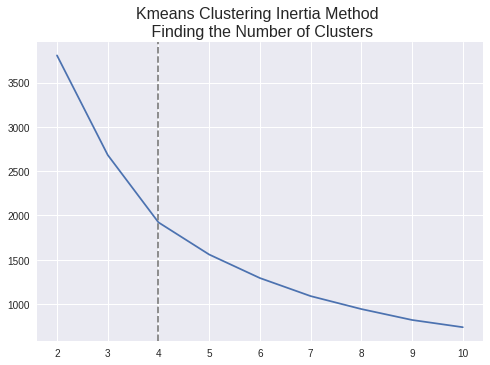

In [102]:
# inertia score - elbow plot 
sns.lineplot(KRANGE, inertia)

plt.axvline(x=4,c='gray', linestyle='--')
plt.title("Kmeans Clustering Inertia Method \n Finding the Number of Clusters", fontsize=16)
plt.show()

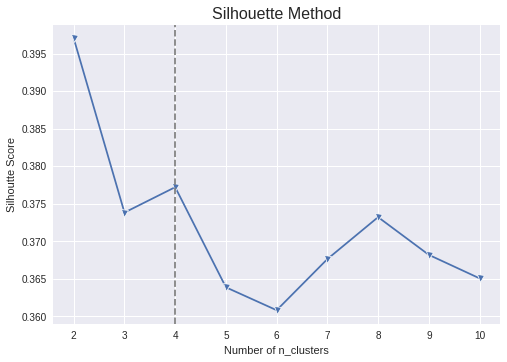

In [103]:
# Silhouette score
sns.lineplot(x=KRANGE, y=sil_score, marker='v')
plt.title('Silhouette Method', fontsize=16) 
plt.xlabel('Number of n_clusters')
plt.ylabel('Silhoutte Score')
plt.axvline(x=4,c='gray', linestyle='--')
plt.show()

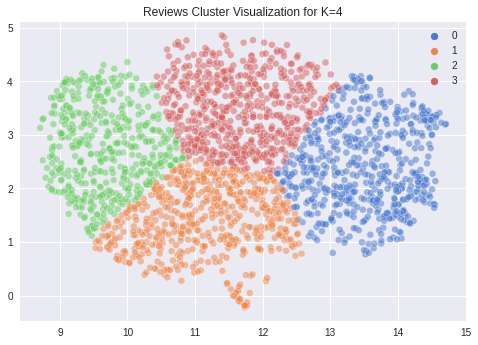

In [104]:
# k = 4 arbitrary selection
km = KMeans(4)
km.fit(embeds)
preds = km.predict(embeds)

# plot
sns.scatterplot(x=embeds[:, 0], y=embeds[:, 1], hue=preds, alpha=.5, palette="muted")
plt.title('Reviews Cluster Visualization for K=4')
plt.show()

In [105]:
# about the words that are close/similar to the cluster centers
centers = km.cluster_centers_

wvs_umap = reducer.transform(wvs_df)

# for each cluster, compare the center to the word embeddings via umap
# get the top 20 closest
# the umap embeddings for the word vectors is the lookup table
knn = NearestNeighbors(n_neighbors=15, metric="cosine")
knn.fit(wvs_umap)

# get the top similar tokens for each cluster
nbrs = knn.kneighbors(centers, return_distance=False)

# loop for all clusters
topic_terms = []

for k in nbrs:
  topic_terms.append(wvs_df.iloc[k, :].index.to_list())

In [106]:
# topic terms
for i, topic in enumerate(topic_terms):
  print((i, topic))

(0, ['conditions', 'chai', 'burned', 'minimize', 'advise', 'Husband', 'Garden', 'heartburn', 'b', 'refuses', 'Overall', 'carry', 'Bay', ':(', 'Colombian'])
(1, ['created', 'grass', 'yield', 'damaged', 'They', 'Oddly', '@', 'flavourful', 'pod', 'smoothest', 'increased', 'our', 'stopped', 'carbonation', 'pak'])
(2, ['repeat', 'keep', 'fussiness', 'bouillon', 'adverse', 'Juice', 'human', 'chewing', 'opinions', 'strawberry', 'round', 'Kashi', 'loose', 'Press', 'title'])
(3, ['supply', 'so', 'HP', 'Silver', 'Holistic', 'enjoys', 'off', 'down', 'stains', 'Excellent', 'hated', 'training', 'wallet', 'claims', 'crystals'])


## 5. Clustering Analysis

### 5.1 Preprocessing - Scaling

In [107]:
df.drop(columns='age_cats', inplace=True)

In [108]:
# first, we are going to scale the data given the varying units of measurement
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [109]:
df_scaled.describe()

,education,income,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,living_status,family_member,is_parent,age
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,3.764319e-17,-1.146141e-16,-2.491979e-17,4.617564e-17,1.149372e-17,2.800653e-17,-1.736606e-17,-5.586249e-17,6.901251e-18,-2.652590e-16,-1.537599e-16,-2.309786e-16,-7.734420e-17,6.765735e-17,-1.906251e-16,-2.087942e-17,1.972503e-16,-6.594082e-16,3.985159e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-2.450950e+00,-2.333791e+00,-1.694030e+00,-9.052351e-01,-6.626279e-01,-7.449911e-01,-6.875269e-01,-6.583604e-01,-8.497071e-01,-1.208163e+00,-1.491175e+00,-9.130004e-01,-1.786506e+00,-2.194360e+00,-9.552009e-02,-1.349603e+00,-1.758359e+00,-1.581139e+00,-2.315280e+00
25%,-4.588495e-01,-7.771113e-01,-8.646302e-01,-8.340705e-01,-6.122946e-01,-6.736275e-01,-6.327421e-01,-6.340186e-01,-6.756101e-01,-6.884322e-01,-7.616650e-01,-9.130004e-01,-8.634873e-01,-9.572709e-01,-9.552009e-02,-1.349603e+00,-6.546443e-01,-1.581139e+00,-6.912026e-01
50%,-4.588495e-01,-2.731156e-02,-6.717941e-04,-3.848445e-01,-4.612945e-01,-4.416956e-01,-4.683875e-01,-4.636265e-01,-3.757762e-01,-1.687011e-01,-3.215516e-02,-2.296788e-01,-2.481413e-01,2.798177e-01,-9.552009e-02,7.409586e-01,4.490700e-01,6.324555e-01,-9.285849e-02
75%,5.372006e-01,7.679525e-01,8.632866e-01,5.921851e-01,1.678727e-01,2.908968e-01,2.255541e-01,1.449170e-01,2.335637e-01,3.510299e-01,6.973547e-01,4.536427e-01,6.748776e-01,6.921805e-01,-9.552009e-02,7.409586e-01,4.490700e-01,6.324555e-01,8.473966e-01
max,1.533251e+00,5.131311e+00,1.727245e+00,3.521791e+00,4.345543e+00,6.948902e+00,4.042233e+00,5.719175e+00,5.359756e+00,6.587802e+00,8.357208e+00,8.653501e+00,2.213242e+00,6.052898e+00,1.046900e+01,7.409586e-01,2.656499e+00,6.324555e-01,2.471473e+00


### 5.2 Hierarchical Clustering

In [110]:
# using different combination of linkage methods and distance metrics,
method_1 = ['single','complete','average','weighted']
method_2 = ['centroid','median','ward']
metric = ['euclidean','cosine','correlation']

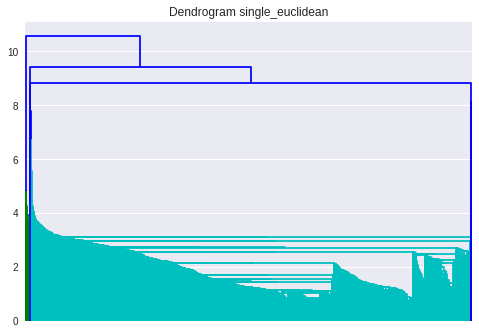

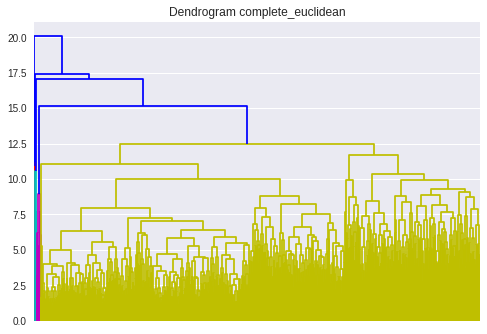

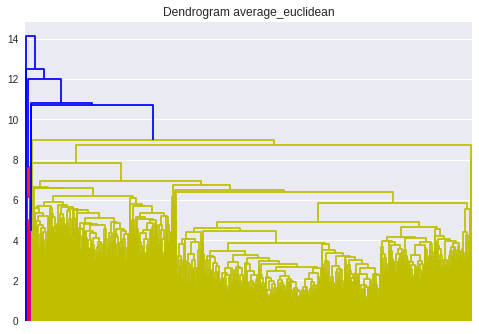

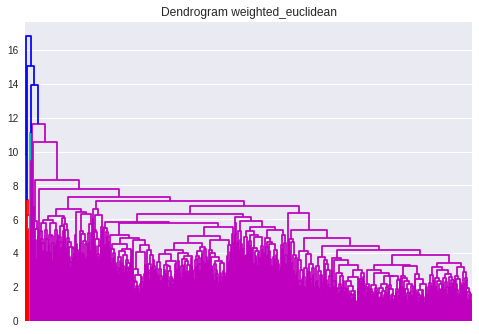

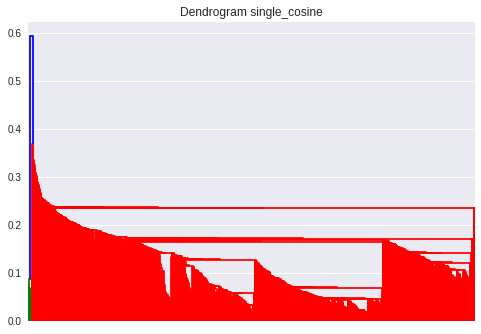

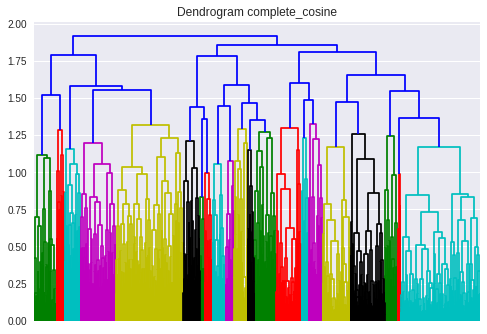

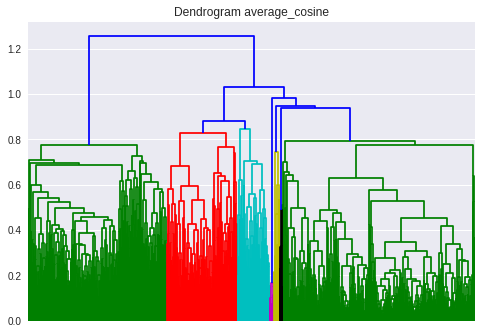

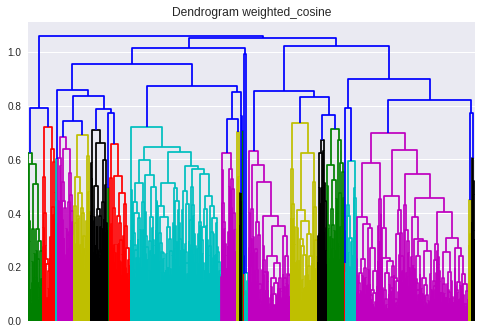

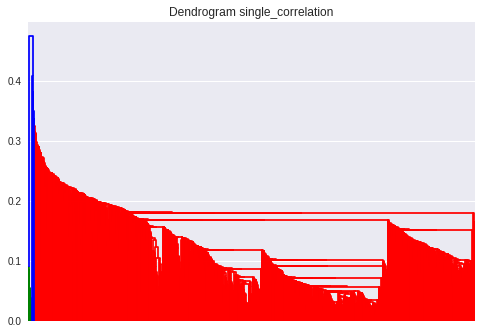

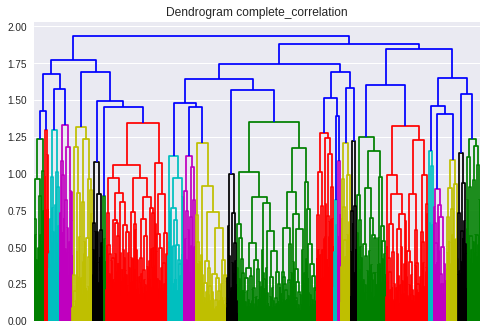

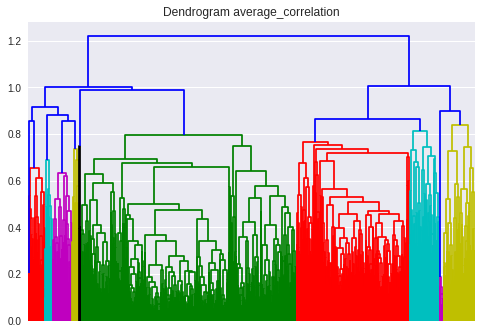

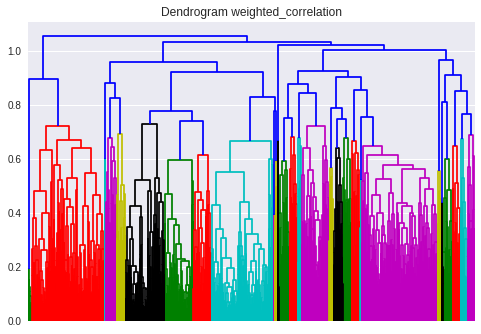

In [111]:
# dendrogram plots
lk = dict()
# for loop begins:
for i in metric:
  for j in method_1:
      temp_lk = linkage(df_scaled, method=j, metric = i)
      lk[str(j)+'_'+str(i)] = temp_lk
      dendrogram(temp_lk, no_labels = True)
      plt.title('Dendrogram '+ j + '_' + i)
      plt.show()

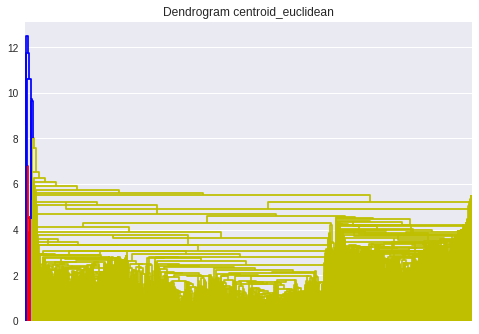

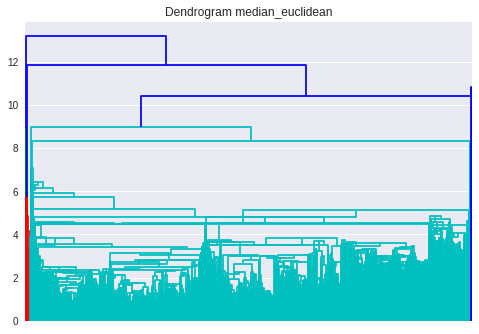

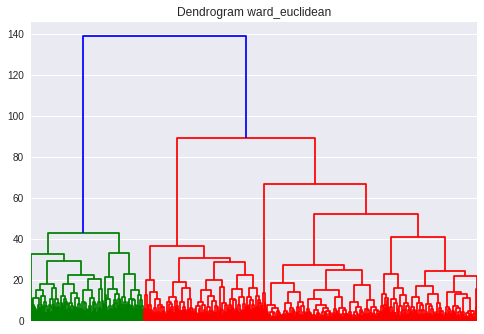

In [112]:

# for methods that can only be used with metric 'euclidean'
for i in method_2:
    temp_lk = linkage(df_scaled, i)
    lk[str(i)+'_'+'euclidean'] = temp_lk
    dendrogram(temp_lk, no_labels=True)
    plt.title('Dendrogram '+ i + '_' + 'euclidean')
    plt.show()

In [113]:
# based on the graph, we will choose cosine_complete method to generate 4 clusters
distc = pdist(df_scaled.values, metric="cosine")
labs4c = fcluster(linkage(distc, method='complete'), 4, criterion='maxclust')

In [114]:
# confirm
np.unique(labs4c)

array([1, 2, 3, 4], dtype=int32)

#### 5.2.1 Cluster Visualization - TSNE

In [115]:
# initializing TSNE model
tsne = TSNE()
# fit data for h4
tsne.fit(df_scaled)
#extrating tsne.embedding_
te = tsne.embedding_
# construct new dataframe for plotting
tdata = pd.DataFrame(te, columns = ['e1','e2'])
# add predicted Kmeans(4) labels
tdata['lab'] = labs4c

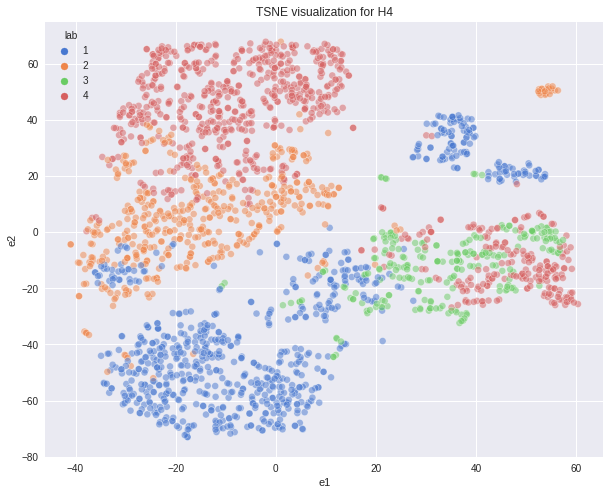

In [116]:
# plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="e1", y="e2", hue="lab", data=tdata, legend="full", 
                alpha = .5, palette="muted")
plt.title("TSNE visualization for H4")
plt.show()

### 5.3 K-Means Clustering

In [117]:
# KMeans Clustering 
# Find the suitable K for the dataset
KRANGE = range(2, 11)

X = df_scaled
X = pd.DataFrame(X)
j = X.copy()

inertia = []
sil_score = []
for k in KRANGE:
    km = KMeans(k)
    lab = km.fit_predict(j)
    inertia.append(km.inertia_)
    s = metrics.silhouette_score(j, km.labels_, metric='euclidean')
    sil_score.append(s)

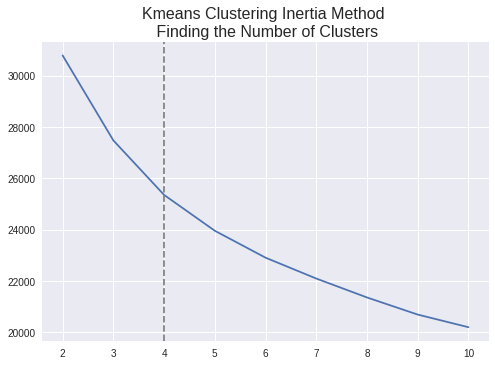

In [118]:
# inertia score - elbow plot 

sns.lineplot(KRANGE, inertia)

plt.axvline(x=4,c='gray', linestyle='--')
plt.title("Kmeans Clustering Inertia Method \n Finding the Number of Clusters", fontsize=16)
plt.show()

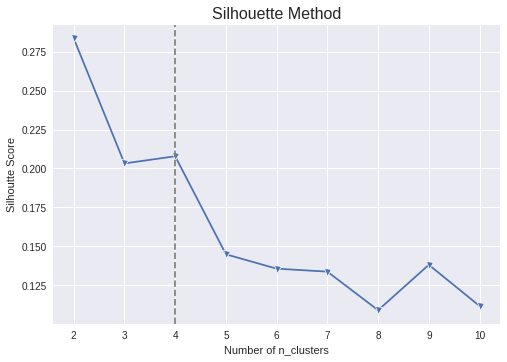

In [119]:
# Silhouette score
sns.lineplot(x=KRANGE, y=sil_score, marker='v')
plt.title('Silhouette Method', fontsize=16) 
plt.xlabel('Number of n_clusters')
plt.ylabel('Silhoutte Score')
plt.axvline(x=4,c='gray', linestyle='--')
plt.show()

In [120]:
# predict with k=4
k4 = KMeans(4,random_state=820)
k4_label = k4.fit_predict(df_scaled)

In [121]:
# append labels to the original dataset
df_c['k4'] = k4_label
pd.set_option('display.max_colwidth', 50)
df_c.head(3)

,education,income,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,reviews,living_status,family_member,is_parent,age,potential_churn,k4
id,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,I love these pouches for on-the-go snacks! I ...,0,1,0,64,0,0
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,Popchips are a great healthy alternative for c...,0,3,1,67,0,3
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,My dog demolished her busy bone in under 5 min...,1,2,0,56,0,0


In [122]:
# count of each cluster
df_c.k4.value_counts()

1    645
2    558
0    544
3    465
Name: k4, dtype: int64

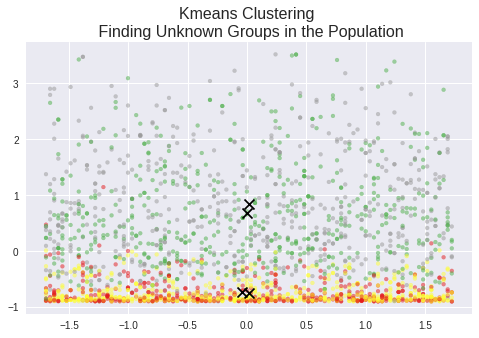

In [123]:
# visualize with cluster centers 
fig = plt.figure(figsize=(8,5))
X = df_scaled
X = pd.DataFrame(X)

plt.scatter(X.values[:,2], X.values[:,3], c=k4.labels_, cmap="Set1_r", s=15,
            alpha = 0.5)
plt.scatter(k4.cluster_centers_[:,2] ,k4.cluster_centers_[:,3], color='black', 
            marker="x", s=100)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

#### 5.3.1 Cluster Visualization - TSNE

In [124]:
# initializing TSNE model
tsne = TSNE()
# fit data for k4
tsne.fit(df_scaled)
#extrating tsne.embedding_
te = tsne.embedding_
# construct new dataframe for plotting
tdata = pd.DataFrame(te, columns = ['e1','e2'])
# add predicted Kmeans(4) labels
tdata['lab'] = k4_label

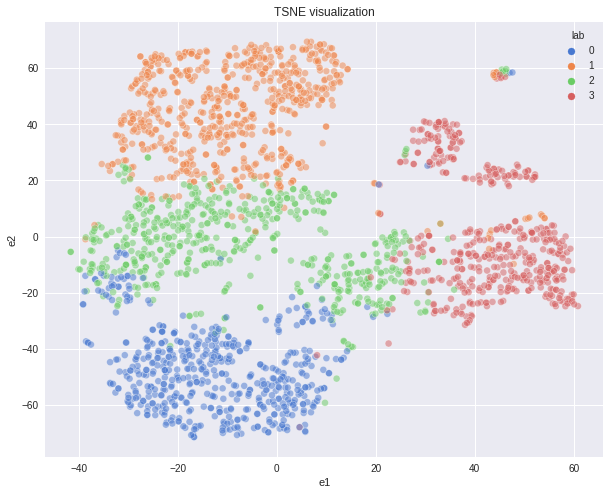

In [125]:
# plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="e1", y="e2", hue="lab", data=tdata, legend="full",
                alpha = .5, palette="muted")
plt.title("TSNE visualization")
plt.show()

#### 5.3.2 Cluster Visualization - PCA

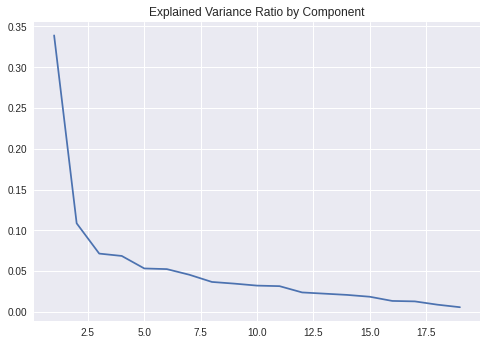

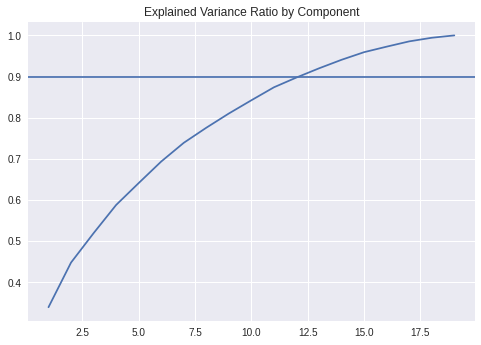

In [126]:
# fit first model for PCA
pca = PCA()
pcs = pca.fit_transform(df_scaled)
varexp = pca.explained_variance_ratio_

# plot 
plt.title("Explained Variance Ratio by Component")
sns.lineplot(range(1, len(varexp)+1), varexp)
plt.show()

# cumulative view
plt.title("Explained Variance Ratio by Component")
sns.lineplot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.90)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap with 8 variables')

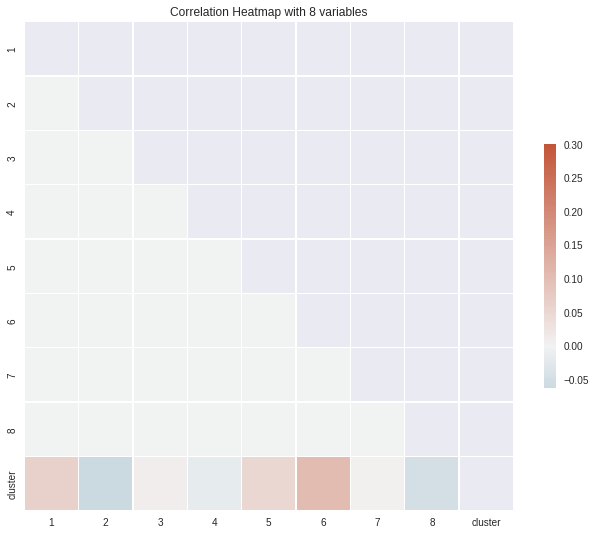

In [127]:
# new pca dataset contains only 
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df_scaled.values)
df_8 = pd.DataFrame()
for i in range(1,9):
  df_8[str(i)] = pca_result[:,i-1]
df_8['cluster'] = df_c['k4']

# Compute the correlation matrix
corr = df_8.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap with 8 variables")

Explained variation per principal component: [0.33905421 0.10859112 0.07146144]
Explained variation top 3 principal components: 0.5191067646753537


Text(0.5, 1.0, 'Two-dimensional Cluster Visualization (PCA)')

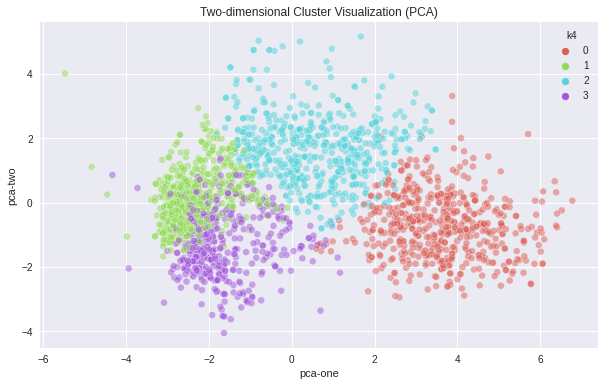

In [128]:
# The top 3 principal component could explain 96% infomation of our data
pca = PCA(n_components=3)
# pca_result = pca.fit_transform(df_scaled.values)
pca_result = pca.fit_transform(df_scaled.values)
df_scaled['k4'] = k4_label.tolist()
# df = pd.DataFrame()
df_scaled['pca-one'] = pca_result[:,0]
df_scaled['pca-two'] = pca_result[:,1] 
df_scaled['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained variation top 3 principal components: {}'.format(sum(pca.explained_variance_ratio_)))


# 2 principal components could clearly display our clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="k4",
    palette=sns.color_palette("hls", 4),
    data=df_scaled,
    legend="full",
    alpha=0.5
)
plt.title("Two-dimensional Cluster Visualization (PCA)")
# plt.xlim(-10,20)
# plt.ylim(-10,20)

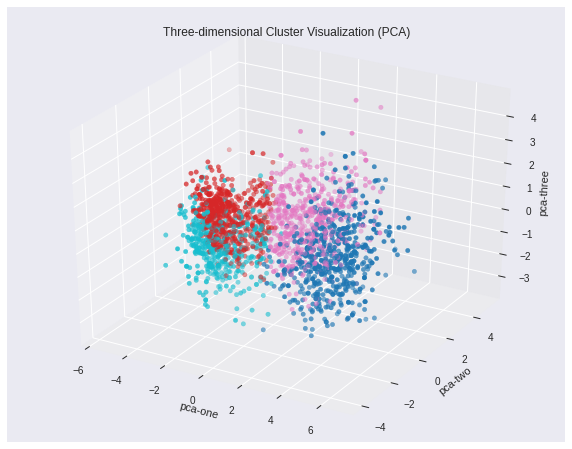

In [129]:
# Three-dimensional Cluster Visualization (PCA)
ax = plt.figure(figsize=(10,8)).gca(projection='3d')
ax.scatter(
    xs=df_scaled["pca-one"], 
    ys=df_scaled["pca-two"], 
    zs=df_scaled["pca-three"], 
    c=df_scaled["k4"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

# plt.xlim(-10,15)
# plt.ylim(-10,15)
plt.title("Three-dimensional Cluster Visualization (PCA)")
plt.show()

## 6. Accessment and Profiling

### 6.1 H Cluster Profiling

In [130]:
df_h = df_c.drop(columns=['k4', 'reviews'])

In [131]:
# put labels onto the df_scaled dataset
df_h['Hcluster4'] = labs4c

In [132]:
df_h.sample(3)

,education,income,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,living_status,family_member,is_parent,age,potential_churn,Hcluster4
id,,,,,,,,,,,,,,,,,,,,,
11110,2,3502.0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,2,1,48,0,4
7250,2,57867.0,48,344,35,178,15,23,17,7,7,2,9,6,0,1,3,1,43,0,2
9938,2,80067.0,82,519,17,813,27,173,51,1,4,6,6,2,0,1,2,0,67,0,1


In [133]:
# find how many number of rows per cluster
df_h.Hcluster4.value_counts(dropna=False, sort=False)

2    461
4    782
1    741
3    228
Name: Hcluster4, dtype: int64

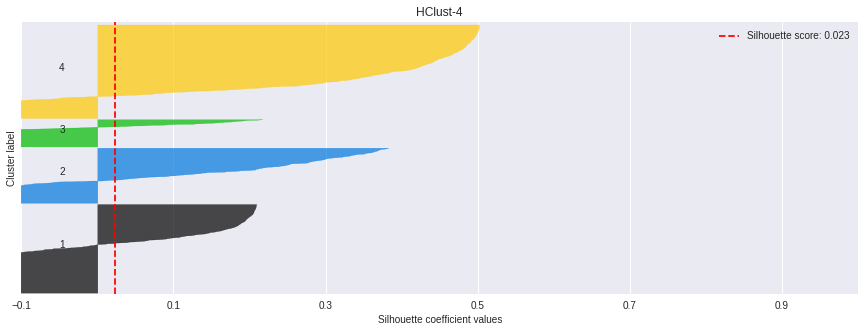

In [134]:
#find the sihouette score with h-clustering for 4 clusters with complete method.  
skplot.metrics.plot_silhouette(df_h, labs4c, title="HClust-4", figsize=(15,5))
plt.show()

In [135]:
# lets profile the cluster solutions
hcluster_numeric=df_h.select_dtypes('number')
hcluster_profile = hcluster_numeric.groupby("Hcluster4").mean()
hcluster_profile.T

Hcluster4,1,2,3,4
education,2.438596,2.585683,2.706140,2.336317
income,65740.481781,60064.182213,50084.697368,34667.893862
recency,48.900135,49.216920,40.679825,51.447570
wines,511.229420,462.058568,188.157895,51.874680
fruits,54.268556,24.310195,14.697368,4.437340
meat,346.580297,170.186551,69.000000,23.613811
fish,76.448043,38.255965,18.381579,6.143223
sweets,54.614035,28.364425,12.565789,4.369565
gold,67.149798,61.058568,32.403509,15.179028
numdealspurchases,1.408907,3.754881,2.714912,2.235294


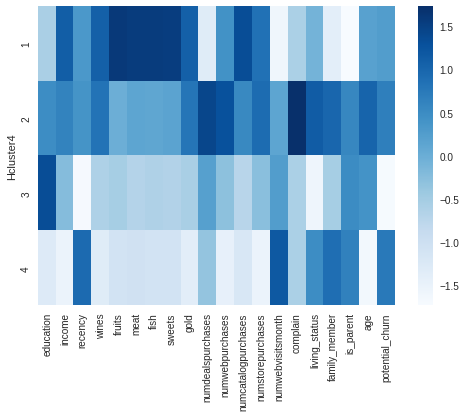

In [136]:
# we can also plot this as a heatmap, but we should normalize the data
scp = StandardScaler()
hcluster_scaled = scp.fit_transform(hcluster_profile)

hcluster_scaled = pd.DataFrame(hcluster_scaled, 
                              index=hcluster_profile.index, 
                              columns=hcluster_profile.columns)

sns.heatmap(hcluster_scaled, cmap="Blues", center=0)
plt.show()

### 6.2 K-Means Cluster Profiling

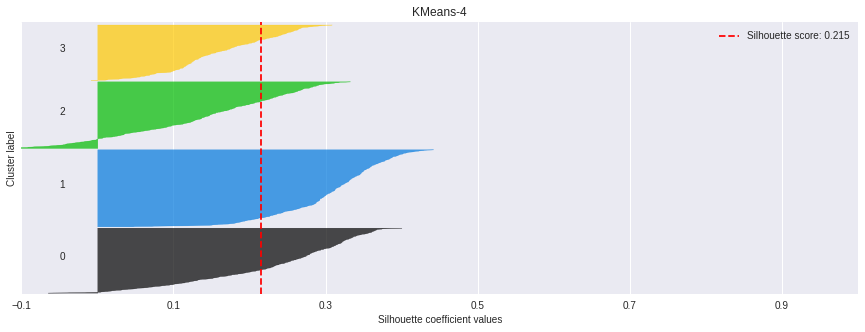

In [137]:
#find the sihouette score with h-clustering for 4 clusters with complete method.  
skplot.metrics.plot_silhouette(df_scaled,k4_label, title="KMeans-4", figsize=(15,5))
plt.show()

In [138]:
profile = df_c.groupby('k4').mean()
profile['avg_total_spend'] = profile.loc[:, 'meat': 'gold'].sum(axis = 1)
profile['meat_perc'] = profile['meat']/profile['avg_total_spend']
profile['fruits_perc'] = profile['fruits']/profile['avg_total_spend']
profile['fish_perc'] = profile['fish']/profile['avg_total_spend']
profile['sweets_perc'] = profile['sweets']/profile['avg_total_spend']
profile['wines_perc'] = profile['wines']/profile['avg_total_spend']
profile['gold_perc'] = profile['gold']/profile['avg_total_spend']
profile.T

k4,0,1,2,3
education,2.452206,2.406202,2.724014,2.230108
income,76133.625000,36702.627907,60562.922939,34513.744086
recency,49.520221,49.403101,49.005376,47.918280
wines,586.900735,52.821705,531.510753,54.556989
fruits,68.658088,4.496124,26.270609,7.165591
meat,461.465074,24.748837,159.424731,29.055914
fish,100.472426,6.466667,34.736559,10.898925
sweets,71.121324,4.390698,26.849462,7.146237
gold,75.794118,14.054264,66.381720,21.131183
numdealspurchases,1.211397,2.224806,3.792115,2.004301


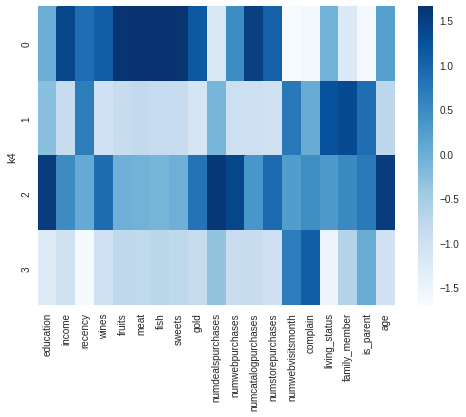

In [139]:
# plot heatmap
scp = StandardScaler()
profile_s = scp.fit_transform(profile.loc[:, 'education':'age'])
profile_s = pd.DataFrame(profile_s, 
                              index=profile.index, 
                              columns=profile.loc[:, 'education':'age'].columns)

sns.heatmap(profile_s, cmap="Blues", center=0)
plt.show()

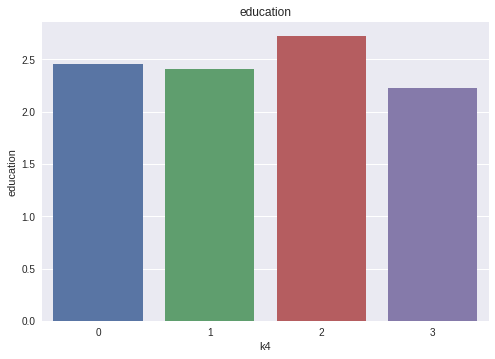

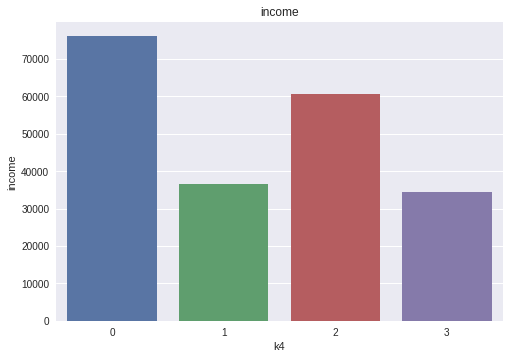

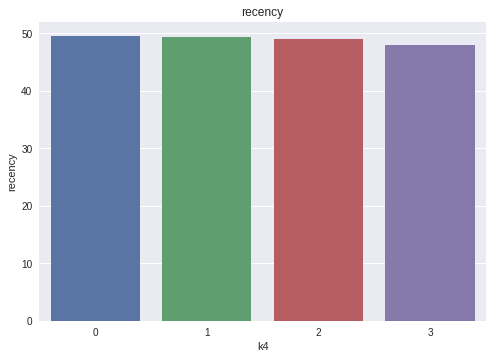

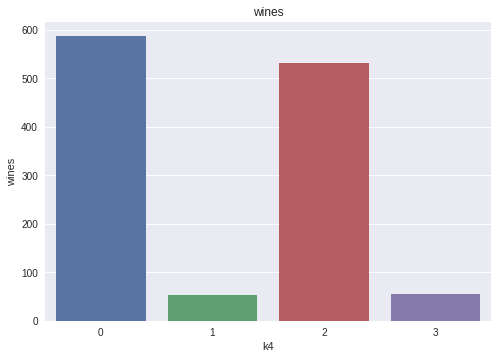

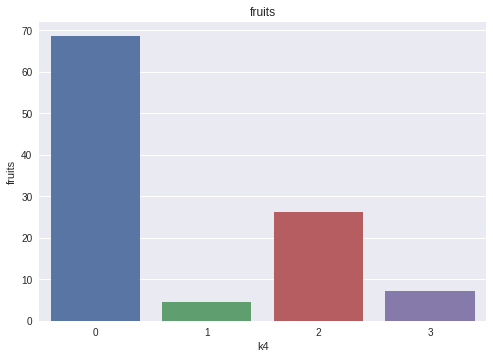

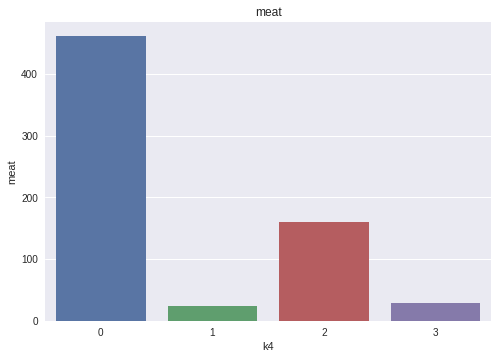

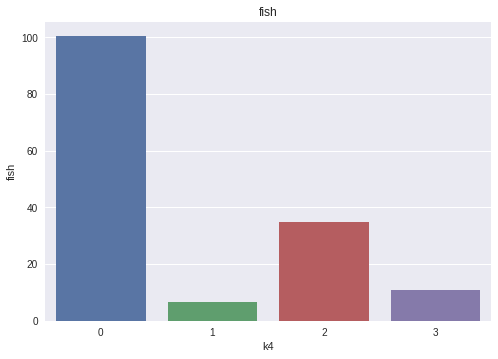

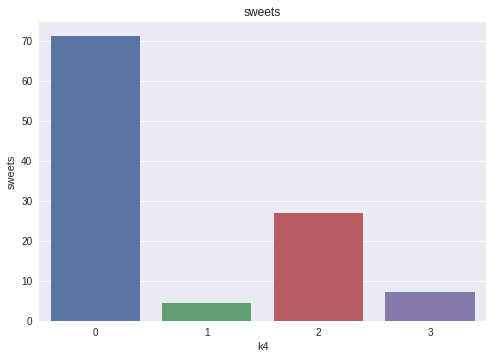

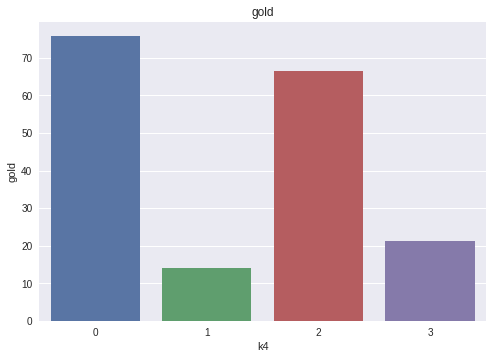

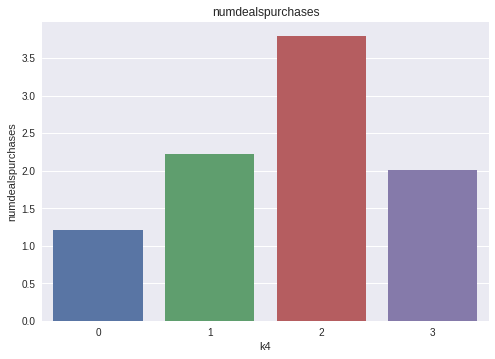

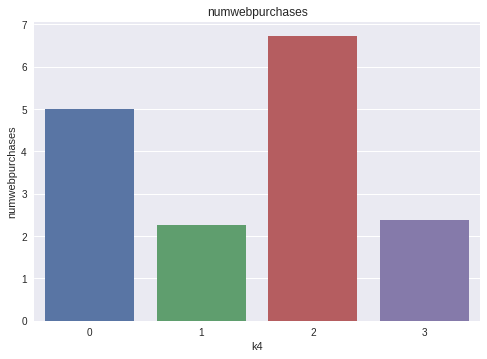

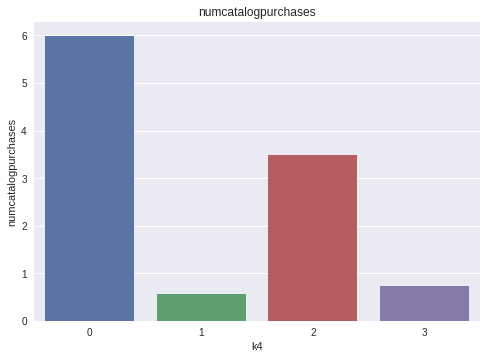

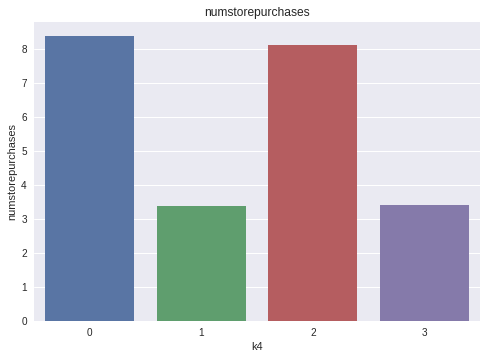

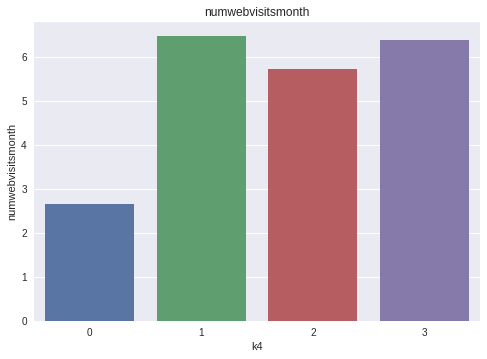

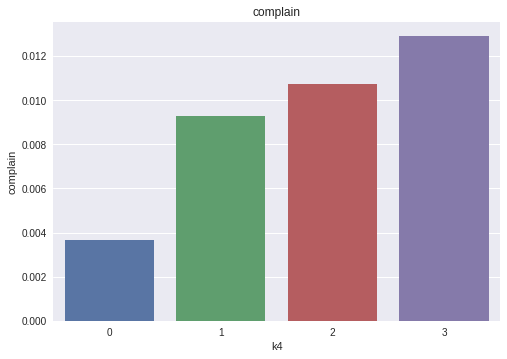

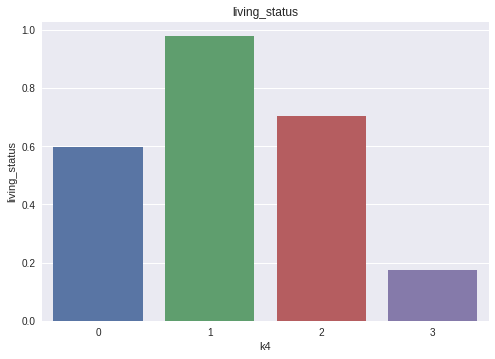

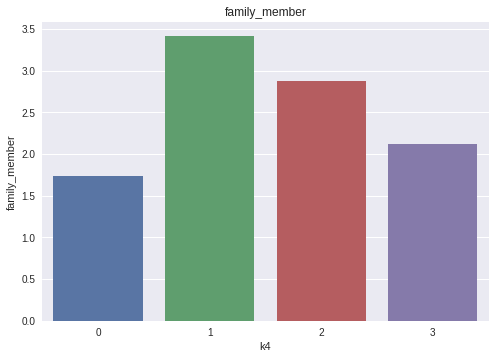

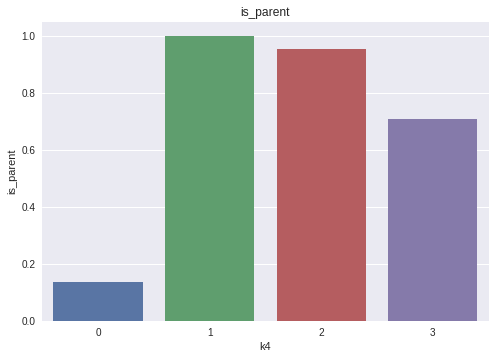

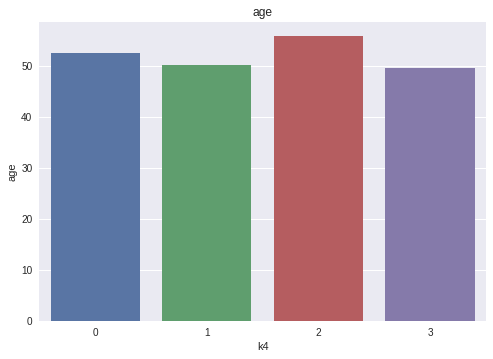

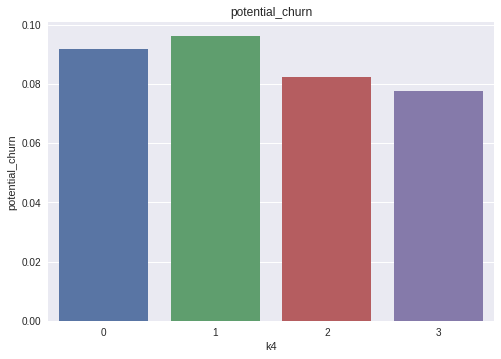

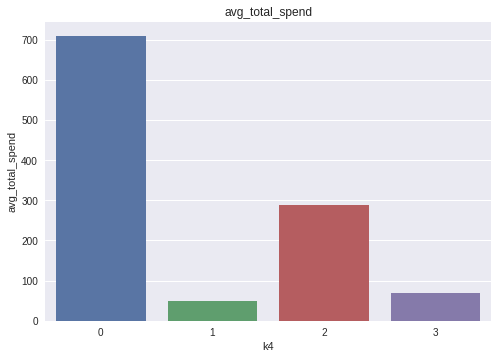

In [140]:
cluster_plots = profile.loc[:, 'education': 'avg_total_spend']
for i in cluster_plots.columns.tolist():
  sns.barplot(x = profile.index, y =cluster_plots[str(i)], data = cluster_plots)
  plt.title(str(i))
  plt.show()

In [141]:
profile.describe().T

,count,mean,std,min,25%,50%,75%,max
education,4.0,2.453132,0.204386,2.230108,2.362178,2.429204,2.520158,2.724014
income,4.0,51978.229983,19962.734849,34513.744086,36155.406952,48632.775423,64455.598454,76133.625000
recency,4.0,48.961744,0.729706,47.918280,48.733602,49.204239,49.432381,49.520221
wines,4.0,306.447546,292.735579,52.821705,54.123168,293.033871,545.358248,586.900735
fruits,4.0,26.647603,29.638150,4.496124,6.498225,16.718100,36.867479,68.658088
meat,4.0,168.673639,204.955137,24.748837,27.979145,94.240323,234.934817,461.465074
fish,4.0,38.143644,43.367388,6.466667,9.790860,22.817742,51.170526,100.472426
sweets,4.0,27.376930,30.830169,4.390698,6.457352,16.997849,37.917428,71.121324
gold,4.0,44.340321,31.257394,14.054264,19.361953,43.756452,68.734820,75.794118
numdealspurchases,4.0,2.308155,1.080785,1.211397,1.806075,2.114554,2.616633,3.792115


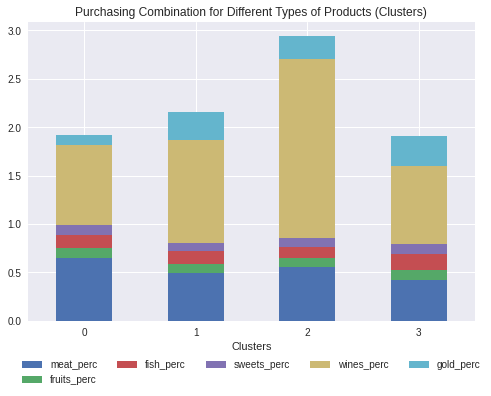

In [142]:
# different types of product purchasing percentage of total spendings, group by different edu level
profile.reset_index(inplace=True)
profile.plot(x='k4', 
             y=["meat_perc", "fruits_perc", "fish_perc", "sweets_perc","wines_perc", "gold_perc"], 
             kind="bar", stacked=True)
plt.title('Purchasing Combination for Different Types of Products (Clusters)')
plt.xlabel('Clusters')
plt.xticks(rotation = 360)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

## 7. Conclusions and Recommendations

Conclusions:
>- Through the correlation heat map, we know that the customer's annual household income is highly positively correlated with the spending on wines and meat in the past two years. And the number of purchases made using the catalog is highly positively correlated with the number of meat consumption and the customer’s annual income.
>- Different types of customers have different consumption habits. In the education level survey of all customers, the number of people with a master's degree is the largest (about 50%), followed by basic education. Compared with other types of education, customers with a master's degree buy more wines, and buy the least sweets and gold. Those with a basic education spend less on wines and meat, and spend more on sweets and gold. When targeting customers with different education types, the company could combine the above characteristics for accurate marketing and advertising.
>- In addition, consumption in stores is still the mainstream so marketing in offline stores is more important than online. Stable customers are those who have purchased goods in the past three months and have a total consumption of less than $1,000, accounting for nearly 80% of total. When distributing advertisements, the company should keep the products to be promoted in an appropriate price range. The total consumption of 1,000 can be used as a reference.
>- There exists high similarity between keywords of positive and negative score reviews, and this can be caused because of different personal perferences or bad quality controls. Top 10 words for positive Afinn score reviews are: like, good, taste, flavor, use, love, product, great, coffee and try. Top 10 words for negative Afinn score reviews are: product, use, taste, like, dog, buy, try, coffee, bad, and flavor.

Here are some recommendations given to the company:
>- For web or catalog purchasing that requires a delivery, the company should make some improvements on product packaging. For fragile items, the packaging needs to take appropriate anti-vibration measures. For fresh meat and vegetables, or some products that need to be kept cold (such as chocolate), ice packs should be included for refrigeration and insulation purposes especially in summer.
>- The company should provide free in-store trails to attract customers to buy more, since in-store purchase is the favorite method for existing customer groups. It would also reduce the differences in tastes and flavors between customer’s expectations and reality.
>- The company should provide customers support in either FAQ sections or online support on their official web-shopping site to give feedback in a timely manner.
>- The company can create persona for each customer segment, and develop different marketing strategies and promotion methods based on their purchasing behaviors. 


For complete report with more detailed information, please refer to [Summary Report](https://docs.google.com/document/d/1JC3wgF3JPmDAmPyZ_OinZfAR8x4eFOlBQlraOVgskcE/edit#)

